In [1]:
import rail

import tables_io
import qp
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import pandas as pd

from rail.evaluation.dist_to_dist_evaluator import DistToDistEvaluator
from rail.evaluation.dist_to_point_evaluator import DistToPointEvaluator
from rail.evaluation.point_to_point_evaluator import PointToPointEvaluator
from rail.evaluation.single_evaluator import SingleEvaluator
from rail.core.stage import RailStage
from rail.core.data import QPHandle, TableHandle, QPOrTableHandle

DS = RailStage.data_store
DS.__class__.allow_overwrite = True

# Dist-to-dist

In [2]:
stage_dict = dict(
    metrics=['cvm', 'ks', 'rmse', 'kld', 'ad'],
    _random_state=None,
)

dtd_stage = DistToDistEvaluator.make_stage(name='dist_to_dist', **stage_dict)
#dtd_stage_single = DistToDistEvaluator.make_stage(name='dist_to_dist', force_exact=True, **stage_dict)

In [11]:
# file = h5py.File(pdfs_file, 'r')
# file.keys

<KeysViewHDF5 ['ancil', 'data', 'meta']>

In [138]:
name_ls = ['BOSS', 'DEEP2', 'GAMA', 'HSC', 'VVDSf02', 'zCOSMOS']
pivot_ls = ["1.0", "1.4"] 
est_ls = ['TrainZ', 'CMNN', 'GPz', 'PZFlow', 'FZBoost']

ztrue_posts_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/output_lsstErr_testSet_posts.hdf5"
ztrue_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/degraded_test_set.pq"
ztrue_test = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/output_lsst_error.pq"
ztrue_data = DS.read_file(key='data', handle_class=QPHandle, path=ztrue_posts_file)
ztrue_data_2 = DS.read_file('ztrue_data', TableHandle, ztrue_posts_file)

In [13]:
ztrue_posts = h5py.File(ztrue_posts_file, 'r')

print(ztrue_posts['data']['yvals'][0])
#print(ztrue_posts['meta']['xvals'][0])

[2.5945375e-04 1.4280826e-07 4.2784366e-05 1.7868918e-04 4.1796817e-04
 4.8638694e-04 3.4152876e-04 1.8957892e-04 3.9455419e-05 9.7020466e-06
 1.7805356e-05 2.9185800e-05 7.1788032e-05 2.2366125e-04 1.0639939e-03
 3.9902353e-03 7.1802707e-03 9.7273579e-03 1.3400209e-02 1.9161200e-02
 8.1049494e-02 6.4368218e-02 4.3023497e-02 2.1869216e-02 1.1651758e-02
 6.5296153e-03 3.3177931e-03 9.3197770e-04 1.3960614e-04 1.0492296e-04
 1.1041774e-04 1.2942773e-04 1.4757541e-04 1.7082589e-04 1.8257802e-04
 2.0949062e-04 2.9427875e-04 4.7667700e-04 1.0025849e-03 3.3843250e-03
 3.3022244e-02 2.6360750e-01 4.0591483e+00 4.6059981e-01 3.6241323e-01
 6.2775642e-01 2.0612280e+00 2.8821682e+01 5.4537284e-01 1.6893095e-01
 6.0294278e-02 3.8242261e-03 4.2129107e-04 1.3238176e-04 2.1002672e-04
 1.2629661e-04 2.0284197e-05 3.8950302e-06 1.1453146e-06 4.3610035e-07
 2.6412877e-07 1.9514628e-07 2.8659838e-07 7.9975740e-07 3.3452309e-06
 2.4333480e-05 1.2658287e-05 5.7022949e-05 9.0587436e-04 3.3529182e-03
 3.314

In [140]:
spec_zs =pd.read_parquet(ztrue_file)

test =pd.read_parquet(ztrue_test)
spec_zs

,redshift,mag_g_lsst,mag_g_lsst_err,mag_i_lsst,mag_i_lsst_err,mag_r_lsst,mag_r_lsst_err,mag_u_lsst,mag_u_lsst_err,mag_y_lsst,mag_y_lsst_err,mag_z_lsst,mag_z_lsst_err
0,0.105590,25.892781,0.058512,25.479875,0.059115,25.564083,0.042958,27.035393,0.440449,25.002035,0.153706,25.420434,0.098670
1,1.257676,23.539185,0.008673,23.356537,0.010026,23.582625,0.008725,23.470746,0.021452,22.549475,0.017991,22.921709,0.011593
2,1.557313,24.436394,0.016534,24.107913,0.017822,24.471637,0.016679,24.285989,0.043261,23.001617,0.026477,23.567260,0.019375
3,1.545218,26.639649,0.112911,25.429023,0.056506,26.057218,0.066544,26.890141,0.394208,24.292745,0.082882,24.844852,0.059361
4,1.477313,27.189966,0.181218,26.120060,0.103995,26.776223,0.125127,26.725555,0.346767,25.306490,0.199037,25.426095,0.099161
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.844861,23.325133,0.007713,20.598261,0.005072,21.920983,0.005280,24.127728,0.037668,19.745683,0.005220,20.018775,0.005080
9996,0.329103,26.384107,0.090290,25.476240,0.058925,25.742140,0.050314,27.352508,0.556639,25.196034,0.181330,25.330387,0.091171
9997,0.996123,26.293842,0.083400,24.796277,0.032255,25.412128,0.037546,26.886391,0.393069,23.829112,0.054981,24.090356,0.030437
9998,0.680142,26.407517,0.092165,24.693269,0.029463,25.436607,0.038369,27.020312,0.435451,24.361193,0.088032,24.444465,0.041610


In [134]:
spec_ls = ['BOSS', 'DEEP2', 'GAMA', 'HSC', 'VVDSf02', 'zCOSMOS']
pivot_ls = ["1.0", "1.4"] 
est_ls = ['TrainZ', 'CMNN', 'GPz', 'PZFlow', 'FZBoost']

def makeFiles(est):
    file_ls = []
    for i in spec_ls:
        file = h5py.File('/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_'+est+'/outputs/'+i+'/output_estimate_'+est+'.hdf5', 'r')
        file_ls.append(file)
    return file_ls

def makePlots(est, dim, size):
    fig, axes = plt.subplots(nrows = dim, ncols = dim, figsize = (size, (2/3)*size)) 
    ct = 0
    for i in range(0, dim):
        for j in range(0, dim):
            axes[i][j].plot(ztrue_posts['meta']['xvals'][0], ztrue_posts['data']['yvals'][ct], label = "true redshift") 
            #axes[i][j].plot(spec_zs['redshift'][ct]*np.ones(len(ztrue_posts['meta']['xvals'][0])), np.linspace(0, 30, 101) )

            max = np.max(ztrue_posts['data']['yvals'][ct])
            ind = np.where(ztrue_posts['data']['yvals'] == max)
            # axes[i][j].plot( ztrue_posts['meta']['xvals'][0][ind[1][0]] * np.ones(len(ztrue_posts['meta']['xvals'][0])), np.linspace(0, 20, 101) , color = 'k')

            if est == 'CMNN' or est == 'GPz':
                arr = ztrue_posts['meta']['xvals'][0]
                val = 0
                for file in makeFiles(est):
                    axes[i][j].plot(arr, (1. /(file['data']['scale'][ct] * np.sqrt(2*np.pi))) * np.exp((-1/2) * ((arr - file['data']['loc'][ct])/ file['data']['scale'][ct] )**2) , label = spec_ls[val])
                    val += 1
                axes[i][j].legend()

            if est == 'TrainZ' or est == 'FZBoost':
                val = 0
                for file in makeFiles(est):
                    axes[i][j].plot(file['meta']['xvals'][0], file['data']['yvals'][ct], label = spec_ls[val])
                    val += 1
                axes[i][j].legend()

            ct += 1


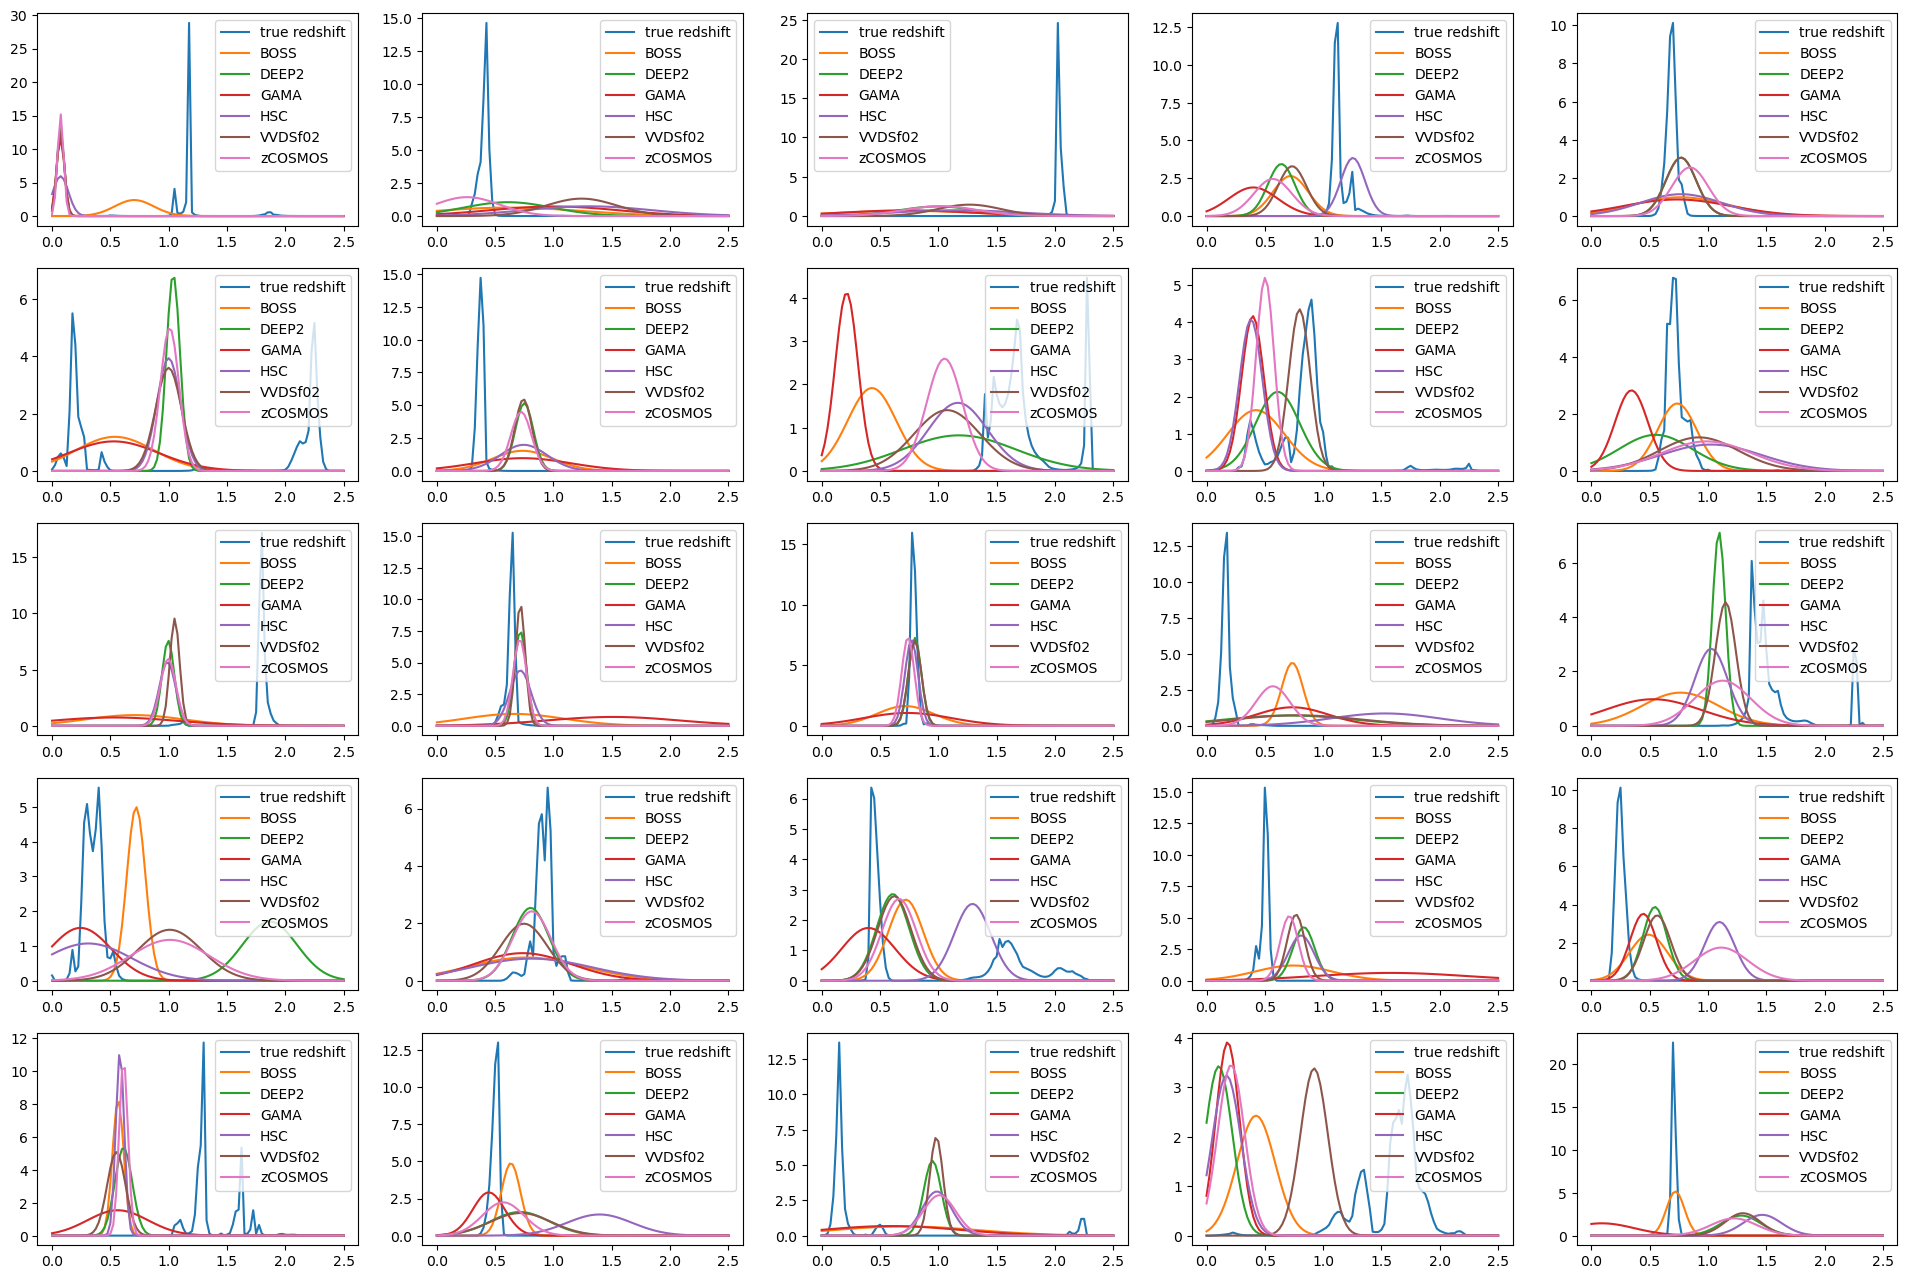

In [125]:
makePlots('CMNN', 5, 24)

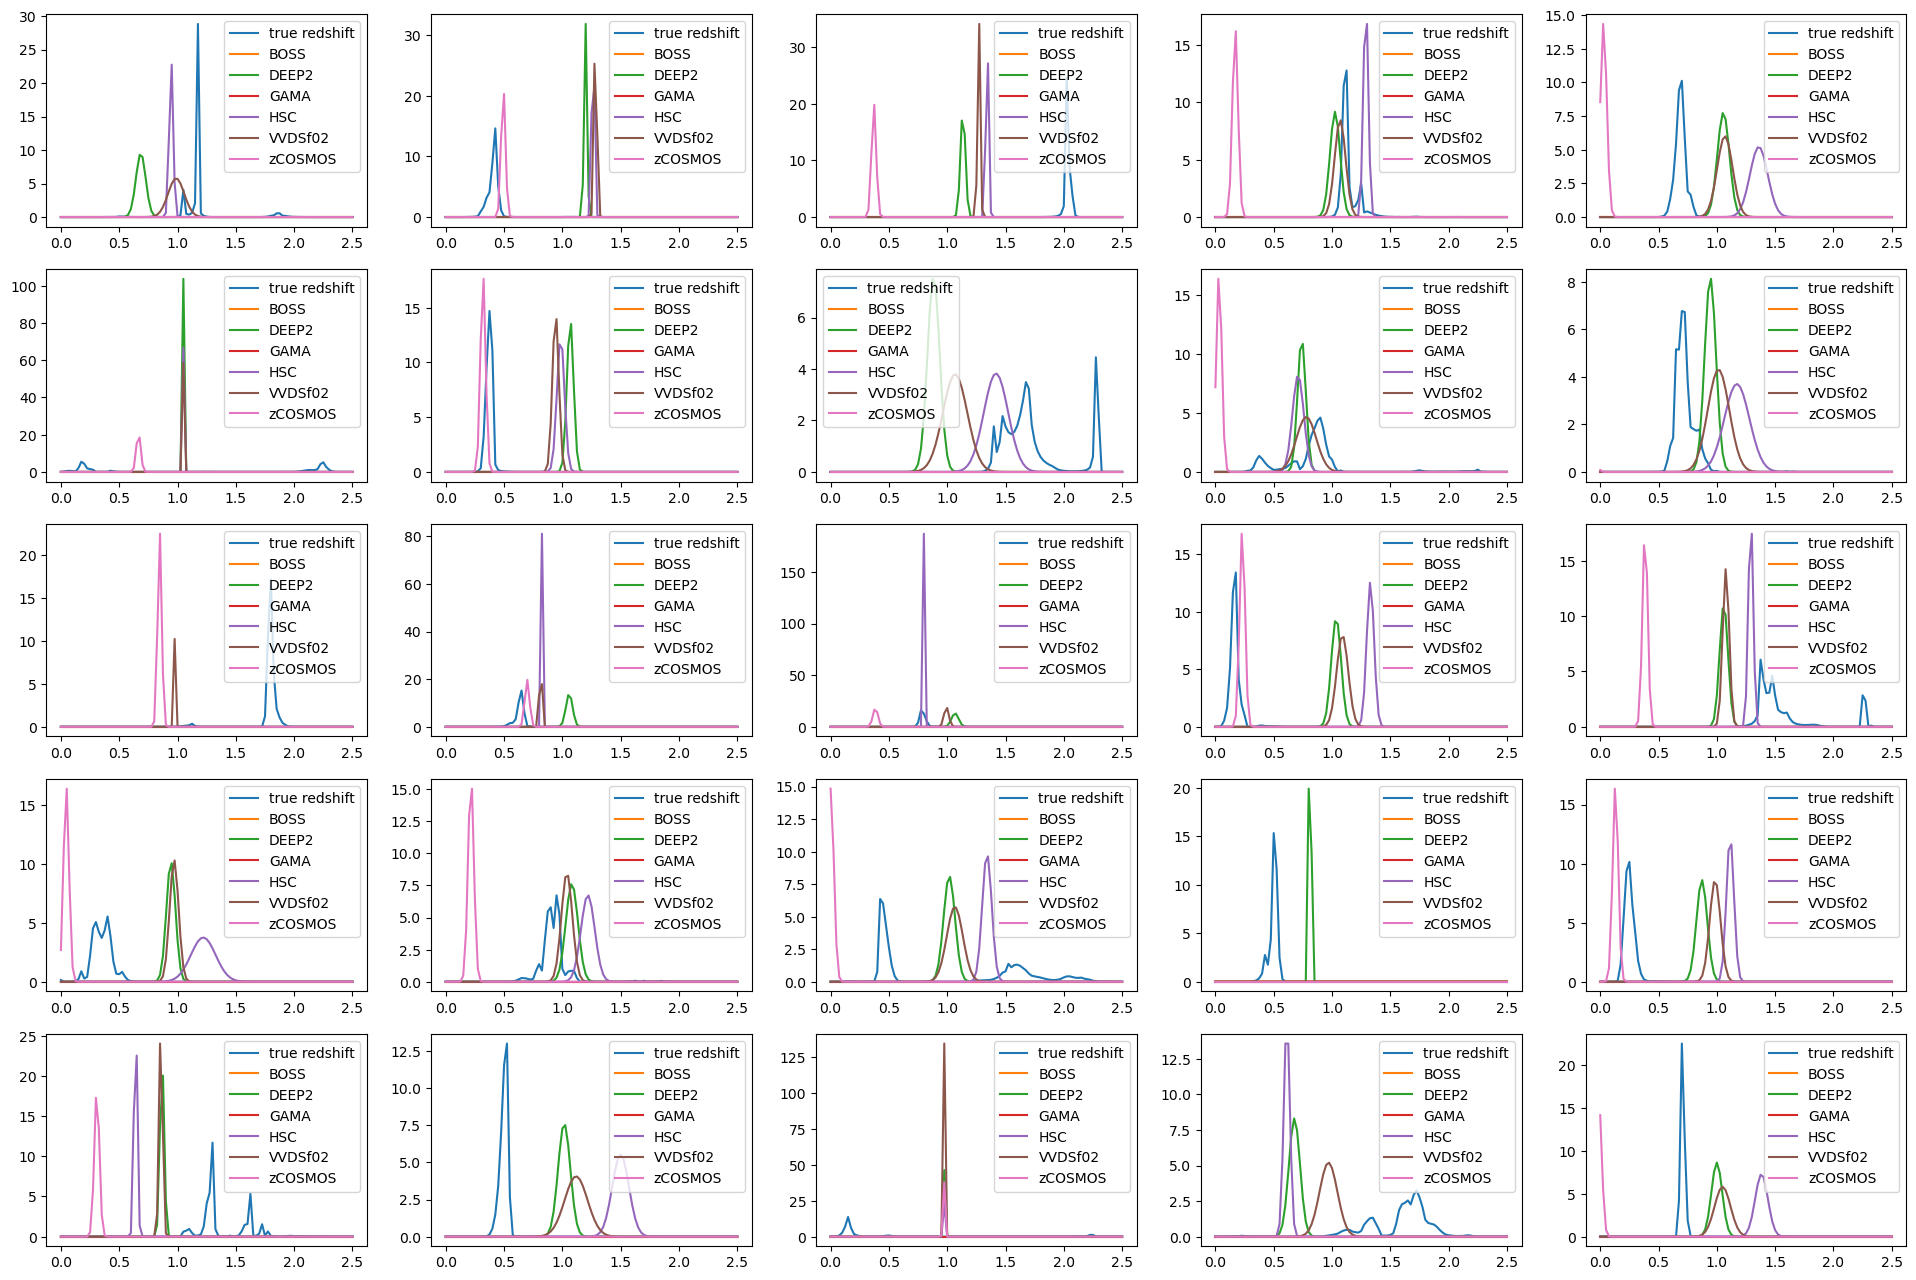

In [126]:
makePlots('GPz', 5, 24)

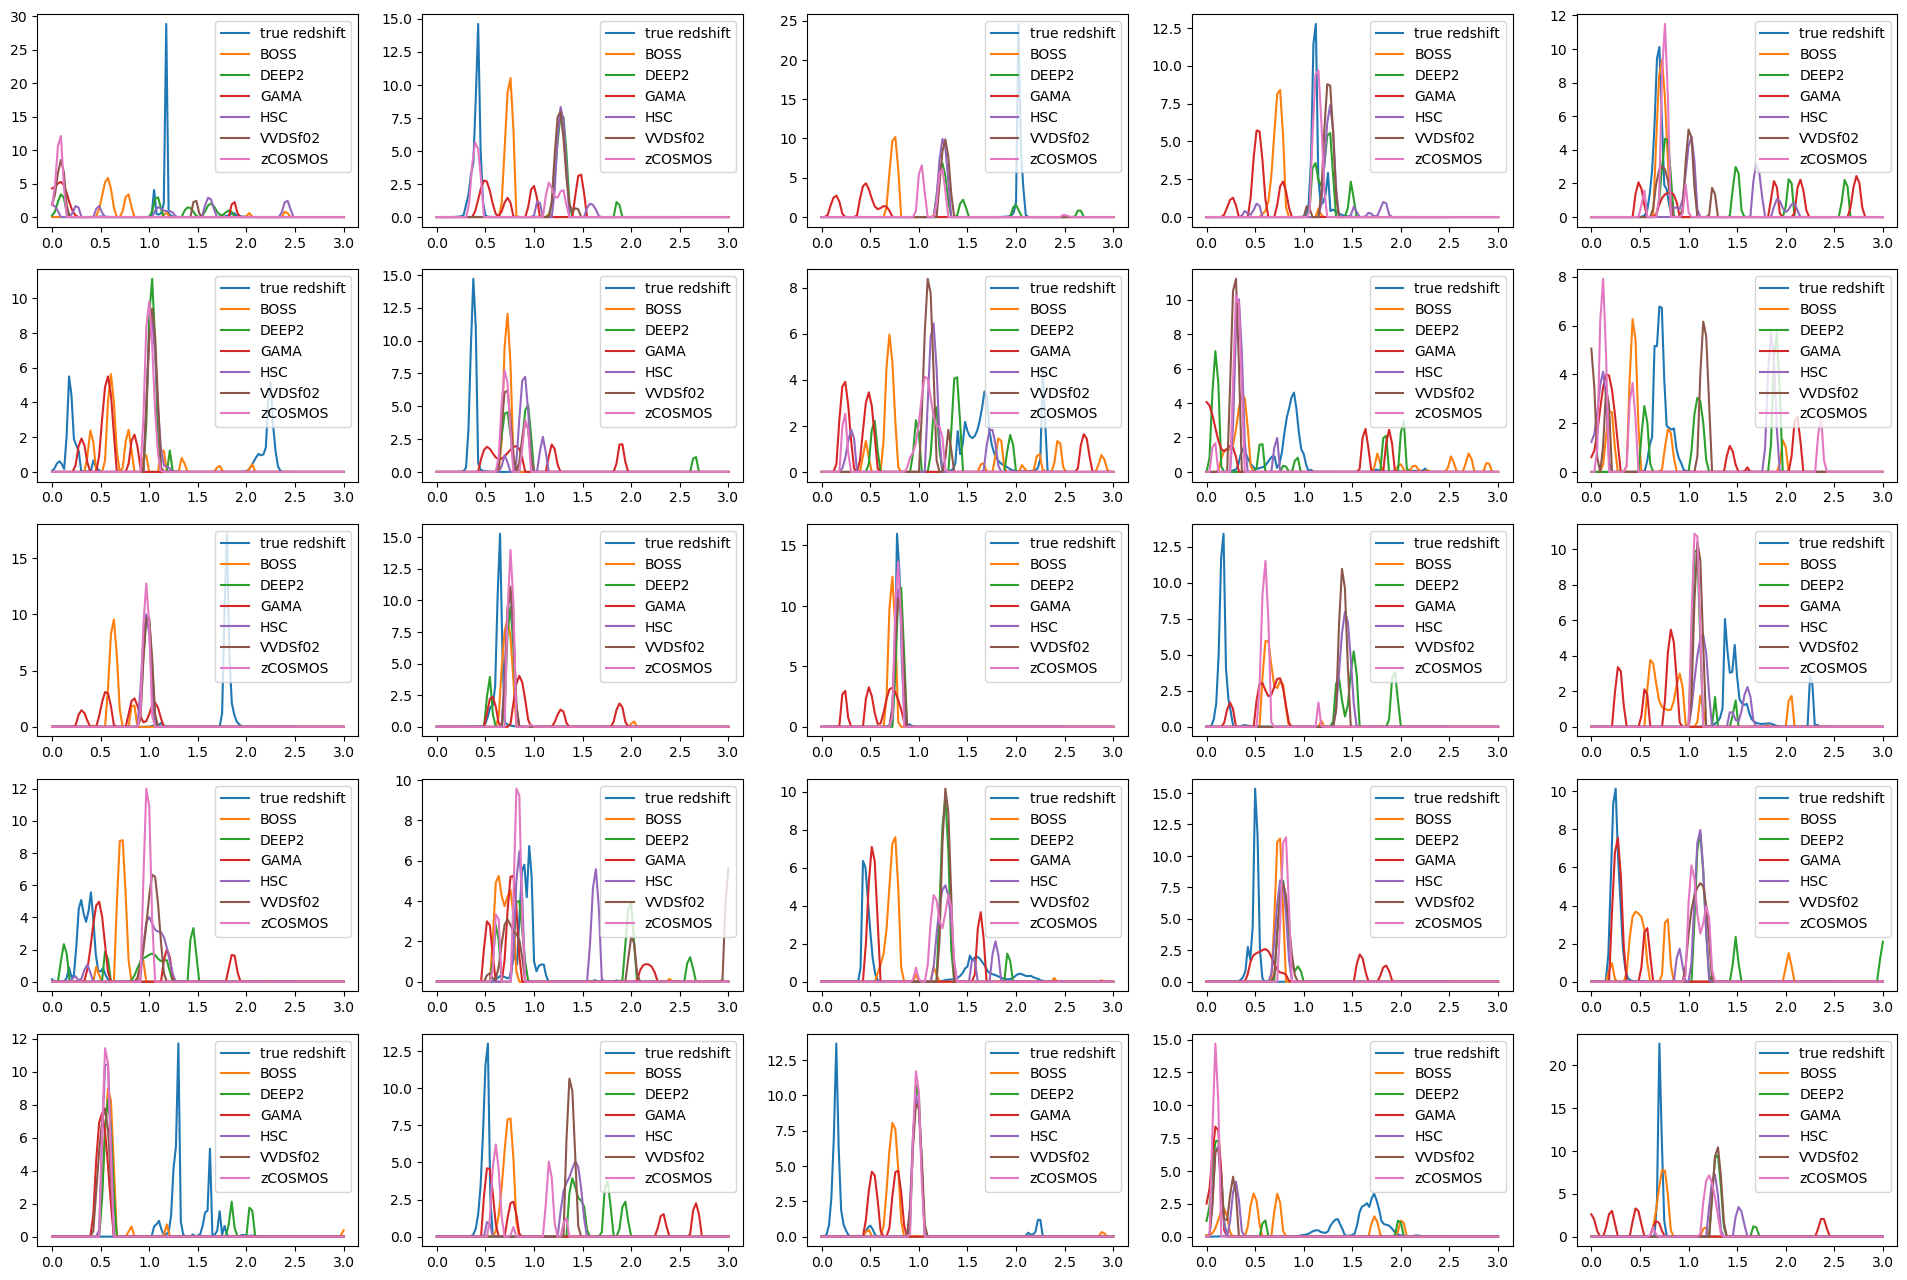

In [135]:
makePlots('FZBoost', 5, 24)

# file = h5py.File('/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_FZBoost/outputs/BOSS/output_estimate_FZBoost.hdf5', 'r')

# file['data']['yvals']

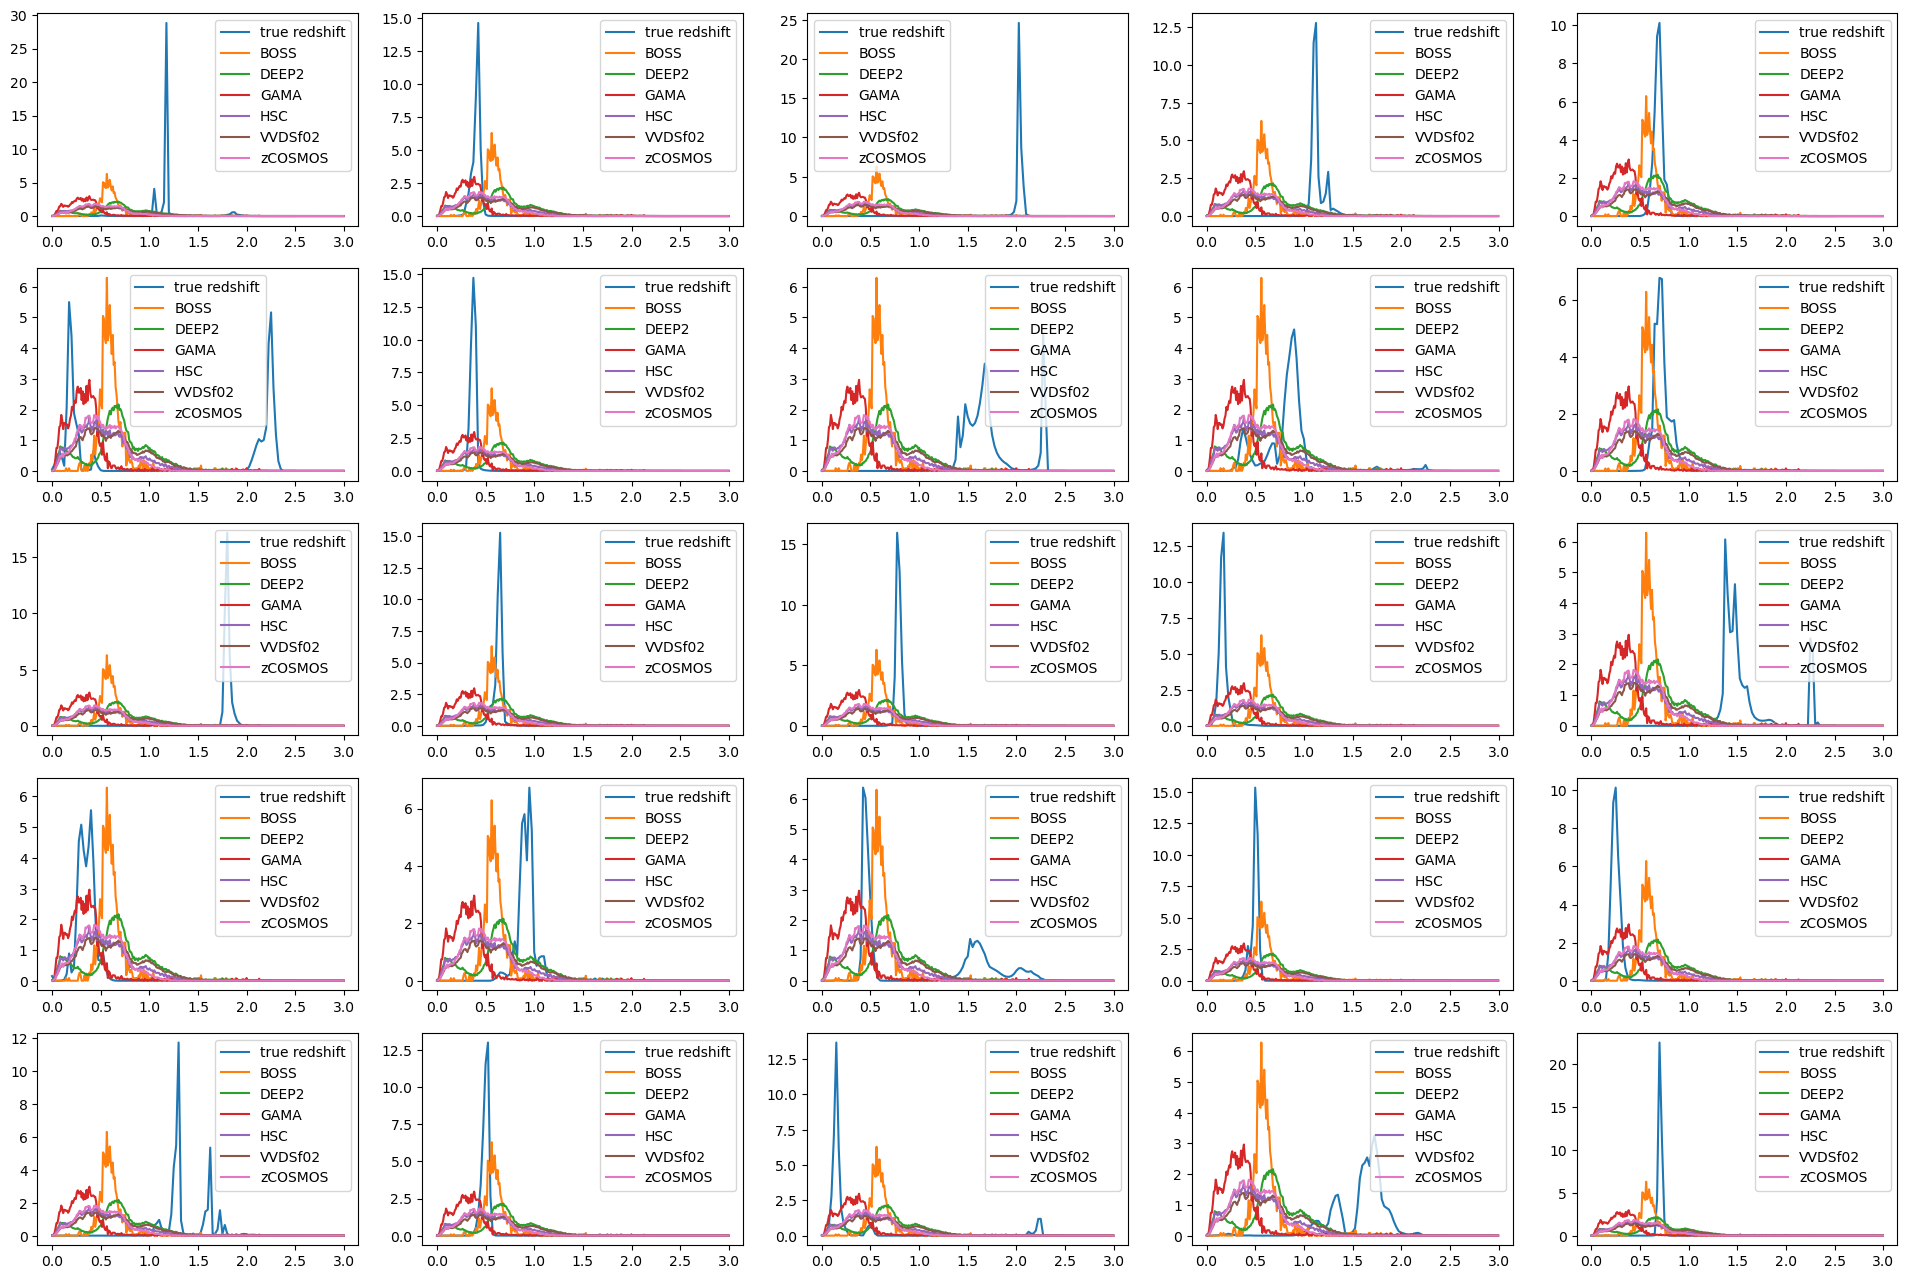

In [136]:
makePlots('TrainZ', 5, 24)

## TrainZ

In [ ]:
## HAS RUN ## 

In [33]:
eval_dir_TrainZ = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/evaluation"
os.chdir(eval_dir_TrainZ)

TrainZ_tables = []

for i in name_ls:
    dir_0 = i
    parent_dir_0 = eval_dir_TrainZ
    path_0 = os.path.join(parent_dir_0, dir_0)
    os.makedirs(path_0, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/"+i+"/output_estimate_TrainZ.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)
    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    TrainZ_tables.append(results_df)

    

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [34]:
TrainZ_tables[0]

,ad,cvm,kld,ks,rmse
0,0.855688,0.256235,0.0,0.118488,0.0
1,0.886621,0.153236,0.0,0.079473,0.0
2,0.347944,0.106052,0.0,0.087255,0.0
3,0.554242,0.336850,0.0,0.082610,0.0
4,0.584580,0.147540,0.0,0.054884,0.0
...,...,...,...,...,...
9995,1.067737,0.210225,0.0,0.080520,0.0
9996,1.187286,0.027624,0.0,0.055992,0.0
9997,2.432040,0.124817,0.0,0.079177,0.0
9998,1.176305,0.082490,0.0,0.065377,0.0


In [35]:
TrainZ_tables[1]

,ad,cvm,kld,ks,rmse
0,3.094785,0.350439,0.0,0.100981,0.0
1,0.196587,0.104331,0.0,0.059892,0.0
2,1.866904,0.419194,0.0,0.087705,0.0
3,0.749740,0.281045,0.0,0.085979,0.0
4,0.296310,0.022798,0.0,0.094760,0.0
...,...,...,...,...,...
9995,0.538211,0.089135,0.0,0.115952,0.0
9996,0.418697,0.047656,0.0,0.081497,0.0
9997,1.261854,0.050245,0.0,0.096623,0.0
9998,1.462003,0.092815,0.0,0.078858,0.0


In [36]:
TrainZ_tables[2]

,ad,cvm,kld,ks,rmse
0,0.706987,0.221592,0.0,0.046959,0.0
1,0.879563,0.097569,0.0,0.082366,0.0
2,1.584628,0.115661,0.0,0.077024,0.0
3,1.275311,0.089162,0.0,0.075845,0.0
4,0.714125,0.224749,0.0,0.121569,0.0
...,...,...,...,...,...
9995,1.505515,0.362012,0.0,0.070812,0.0
9996,0.322228,0.125389,0.0,0.076848,0.0
9997,0.393319,0.113529,0.0,0.083252,0.0
9998,1.185976,0.095609,0.0,0.088353,0.0


In [37]:
TrainZ_tables[3]

,ad,cvm,kld,ks,rmse
0,0.720122,0.141855,0.0,0.103309,0.0
1,1.010428,0.083003,0.0,0.083361,0.0
2,2.211680,0.527426,0.0,0.118470,0.0
3,0.374955,0.364915,0.0,0.086726,0.0
4,1.109865,0.015487,0.0,0.069002,0.0
...,...,...,...,...,...
9995,1.349120,0.074108,0.0,0.129673,0.0
9996,0.441753,0.058805,0.0,0.065758,0.0
9997,2.301196,0.148119,0.0,0.073915,0.0
9998,0.676388,0.109764,0.0,0.107082,0.0


In [38]:
TrainZ_tables[4]

,ad,cvm,kld,ks,rmse
0,0.427225,0.349633,0.0,0.106059,0.0
1,1.307012,0.114815,0.0,0.083239,0.0
2,1.161372,0.131828,0.0,0.100440,0.0
3,0.607764,0.411160,0.0,0.090334,0.0
4,2.273633,0.072316,0.0,0.086844,0.0
...,...,...,...,...,...
9995,0.491952,0.169586,0.0,0.075859,0.0
9996,2.485977,0.096145,0.0,0.042688,0.0
9997,0.921857,0.092630,0.0,0.087185,0.0
9998,0.544301,0.114025,0.0,0.068243,0.0


In [39]:
TrainZ_tables[5]

,ad,cvm,kld,ks,rmse
0,1.822553,0.113348,0.0,0.055660,0.0
1,0.935546,0.261199,0.0,0.094612,0.0
2,0.591756,0.059789,0.0,0.090438,0.0
3,1.205828,0.373878,0.0,0.104614,0.0
4,0.629594,0.129713,0.0,0.077340,0.0
...,...,...,...,...,...
9995,0.422849,0.156459,0.0,0.092816,0.0
9996,0.655328,0.091767,0.0,0.062863,0.0
9997,0.435894,0.059236,0.0,0.088324,0.0
9998,1.077900,0.068215,0.0,0.058048,0.0


In [40]:
eval_dir_invz_TrainZ = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_TrainZ/evaluation"
os.chdir(eval_dir_invz_TrainZ)

invz_TrainZ_tables = []

for i in pivot_ls:
    dir_0_invz = i
    parent_dir_0_invz = eval_dir_invz_TrainZ
    path_0_invz = os.path.join(parent_dir_0_invz, dir_0_invz)
    os.makedirs(path_0_invz, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_TrainZ/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_TrainZ/outputs/"+i+"/output_estimate_TrainZ.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)

    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    invz_TrainZ_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [41]:
invz_TrainZ_tables[0]

,ad,cvm,kld,ks,rmse
0,0.466199,0.189370,0.0,0.102895,0.0
1,0.957955,0.323571,0.0,0.071436,0.0
2,0.627667,0.118903,0.0,0.058004,0.0
3,0.428707,0.115589,0.0,0.070648,0.0
4,1.584904,0.083175,0.0,0.063102,0.0
...,...,...,...,...,...
9995,0.680781,0.063352,0.0,0.072616,0.0
9996,0.588914,0.049856,0.0,0.091303,0.0
9997,0.680901,0.121343,0.0,0.088552,0.0
9998,1.169660,0.055417,0.0,0.116430,0.0


In [42]:
invz_TrainZ_tables[1]

,ad,cvm,kld,ks,rmse
0,0.330023,0.049053,0.0,0.063644,0.0
1,0.433185,0.184462,0.0,0.050168,0.0
2,0.766633,0.082068,0.0,0.081294,0.0
3,1.322031,0.047460,0.0,0.066502,0.0
4,0.725705,0.380654,0.0,0.056675,0.0
...,...,...,...,...,...
9995,0.766941,0.083550,0.0,0.058923,0.0
9996,0.715143,0.055597,0.0,0.118755,0.0
9997,1.031430,0.062451,0.0,0.091341,0.0
9998,0.503947,0.367514,0.0,0.093399,0.0


## CMNN

In [43]:
eval_dir_CMNN = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_CMNN/evaluation"
os.chdir(eval_dir_CMNN)

CMNN_tables = []

for i in name_ls:
    dir_1 = i
    parent_dir_1 = eval_dir_CMNN
    path_1 = os.path.join(parent_dir_1, dir_1)
    os.makedirs(path_1, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_CMNN/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_CMNN/outputs/"+i+"/output_estimate_CMNN.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)
    
    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    CMNN_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [44]:
CMNN_tables[0]

,ad,cvm,kld,ks,rmse
0,6.817174,0.016779,0.0,0.060834,0.0
1,2.393566,0.287150,0.0,0.121335,0.0
2,1.314057,0.083576,0.0,0.076548,0.0
3,0.331552,0.378348,0.0,0.043656,0.0
4,0.265385,0.053588,0.0,0.094555,0.0
...,...,...,...,...,...
9995,0.741330,0.101015,0.0,0.053609,0.0
9996,4.674873,0.165516,0.0,0.130025,0.0
9997,0.410252,0.067616,0.0,0.065074,0.0
9998,1.270937,0.110794,0.0,0.098309,0.0


In [45]:
CMNN_tables[1]

,ad,cvm,kld,ks,rmse
0,0.637558,0.076757,0.0,0.186183,0.0
1,0.335456,0.076542,0.0,0.073848,0.0
2,3.958518,0.184633,0.0,0.143698,0.0
3,0.696381,0.218503,0.0,0.118732,0.0
4,1.980463,0.274206,0.0,0.100390,0.0
...,...,...,...,...,...
9995,1.423779,0.124471,0.0,0.056555,0.0
9996,0.704573,0.175675,0.0,0.050222,0.0
9997,1.629116,0.052178,0.0,0.104026,0.0
9998,0.707170,0.084450,0.0,0.078504,0.0


In [46]:
CMNN_tables[2]

,ad,cvm,kld,ks,rmse
0,1.009287,0.204103,0.0,0.060263,0.0
1,0.635878,0.207827,0.0,0.076664,0.0
2,1.198250,0.062418,0.0,0.105721,0.0
3,0.368813,0.026838,0.0,0.111805,0.0
4,0.447850,0.018912,0.0,0.066384,0.0
...,...,...,...,...,...
9995,0.310642,0.392284,0.0,0.116837,0.0
9996,1.450466,0.045267,0.0,0.056732,0.0
9997,3.384541,0.170234,0.0,0.081134,0.0
9998,0.347177,0.172693,0.0,0.052164,0.0


In [47]:
CMNN_tables[3]

,ad,cvm,kld,ks,rmse
0,1.130414,0.069519,0.0,0.075243,0.0
1,0.909903,0.303990,0.0,0.087342,0.0
2,1.579170,0.212871,0.0,0.067801,0.0
3,0.687677,0.087161,0.0,0.107386,0.0
4,0.934592,0.117257,0.0,0.052095,0.0
...,...,...,...,...,...
9995,0.941895,0.263916,0.0,0.061726,0.0
9996,0.495880,0.113745,0.0,0.113191,0.0
9997,0.369917,0.065179,0.0,0.123959,0.0
9998,0.407095,0.520917,0.0,0.081655,0.0


In [48]:
CMNN_tables[4]

,ad,cvm,kld,ks,rmse
0,1.326081,0.061181,0.0,0.059212,0.0
1,1.727616,0.130607,0.0,0.070668,0.0
2,0.511104,0.308736,0.0,0.082715,0.0
3,4.228423,0.045527,0.0,0.055316,0.0
4,0.477734,0.086062,0.0,0.121443,0.0
...,...,...,...,...,...
9995,0.908536,0.051275,0.0,0.084030,0.0
9996,0.666615,0.374786,0.0,0.059749,0.0
9997,1.092819,0.090309,0.0,0.145906,0.0
9998,6.887417,0.459304,0.0,0.071687,0.0


In [49]:
CMNN_tables[5]

,ad,cvm,kld,ks,rmse
0,0.728247,0.111884,0.0,0.076904,0.0
1,0.500026,0.108266,0.0,0.068138,0.0
2,2.732048,0.260178,0.0,0.048849,0.0
3,0.365234,0.118926,0.0,0.081424,0.0
4,1.124097,0.455914,0.0,0.065711,0.0
...,...,...,...,...,...
9995,0.332118,0.040034,0.0,0.077650,0.0
9996,0.623867,0.398331,0.0,0.163135,0.0
9997,0.870129,0.059434,0.0,0.076854,0.0
9998,2.261969,1.100047,0.0,0.085676,0.0


In [50]:
eval_dir_invz_CMNN = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_CMNN/evaluation"
os.chdir(eval_dir_invz_CMNN)

invz_CMNN_tables = []

for i in pivot_ls:
    dir_1_invz = i
    parent_dir_1_invz = eval_dir_invz_CMNN
    path_1_invz = os.path.join(parent_dir_1_invz, dir_1_invz)
    os.makedirs(path_1_invz, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_CMNN/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_CMNN/outputs/"+i+"/output_estimate_CMNN.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)

    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    invz_CMNN_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [51]:
invz_CMNN_tables[0]

,ad,cvm,kld,ks,rmse
0,0.287679,0.093348,0.0,0.069052,0.0
1,0.358992,0.054085,0.0,0.107227,0.0
2,2.367719,0.116786,0.0,0.101055,0.0
3,0.430395,0.839012,0.0,0.073180,0.0
4,0.629353,0.052870,0.0,0.093697,0.0
...,...,...,...,...,...
9995,0.384398,0.123753,0.0,0.097366,0.0
9996,3.063554,0.161571,0.0,0.118916,0.0
9997,0.642560,0.071607,0.0,0.128803,0.0
9998,1.200217,0.111767,0.0,0.083789,0.0


In [52]:
invz_CMNN_tables[1]

,ad,cvm,kld,ks,rmse
0,0.645359,0.145480,0.0,0.107172,0.0
1,1.350728,0.128996,0.0,0.048012,0.0
2,2.962869,0.186047,0.0,0.061965,0.0
3,0.705886,0.126358,0.0,0.086421,0.0
4,0.920159,0.180637,0.0,0.058975,0.0
...,...,...,...,...,...
9995,0.471984,0.345627,0.0,0.089362,0.0
9996,0.268886,0.070392,0.0,0.083525,0.0
9997,0.548366,0.223396,0.0,0.087513,0.0
9998,0.793475,0.063132,0.0,0.112332,0.0


## GPz

In [53]:
eval_dir_GPz = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_GPz/evaluation"
os.chdir(eval_dir_GPz)

GPz_tables = []

for i in name_ls:
    dir_2 = i
    parent_dir_2 = eval_dir_GPz
    path_2 = os.path.join(parent_dir_2, dir_2)
    os.makedirs(path_2, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_GPz/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_GPz/outputs/"+i+"/output_estimate_GPz.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)

    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    GPz_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [54]:
GPz_tables[0]

,ad,cvm,kld,ks,rmse
0,0.819443,0.130123,0.0,0.066532,0.0
1,1.681649,0.075779,0.0,0.089561,0.0
2,3.426262,0.158087,0.0,0.072498,0.0
3,0.542254,0.091881,0.0,0.092154,0.0
4,0.199675,0.493110,0.0,0.113780,0.0
...,...,...,...,...,...
9995,0.890761,0.098561,0.0,0.091880,0.0
9996,1.780596,0.040420,0.0,0.092276,0.0
9997,1.029858,0.285748,0.0,0.063161,0.0
9998,1.615115,0.586487,0.0,0.076404,0.0


In [55]:
GPz_tables[1]

,ad,cvm,kld,ks,rmse
0,1.621798,0.122885,0.0,0.103683,0.0
1,0.607888,0.089272,0.0,0.077492,0.0
2,0.415336,0.383966,0.0,0.124001,0.0
3,1.088182,0.078792,0.0,0.092236,0.0
4,4.307943,0.056764,0.0,0.127388,0.0
...,...,...,...,...,...
9995,0.907540,0.137364,0.0,0.086278,0.0
9996,1.422087,0.112227,0.0,0.104131,0.0
9997,0.710667,0.069715,0.0,0.097803,0.0
9998,0.568128,0.090079,0.0,0.056103,0.0


In [56]:
GPz_tables[2]

,ad,cvm,kld,ks,rmse
0,0.375730,0.056698,0.0,0.052849,0.0
1,0.790223,0.089207,0.0,0.198303,0.0
2,0.256671,0.071453,0.0,0.066004,0.0
3,0.372240,0.114842,0.0,0.102609,0.0
4,0.733756,0.062492,0.0,0.048187,0.0
...,...,...,...,...,...
9995,0.769279,0.084957,0.0,0.050963,0.0
9996,0.843411,0.096282,0.0,0.088603,0.0
9997,0.463858,0.043278,0.0,0.041850,0.0
9998,0.741971,0.399514,0.0,0.066576,0.0


In [57]:
GPz_tables[3]

,ad,cvm,kld,ks,rmse
0,0.692951,0.095359,0.0,0.063087,0.0
1,0.219757,0.290385,0.0,0.077262,0.0
2,0.765915,0.076697,0.0,0.131194,0.0
3,0.669470,0.216091,0.0,0.081369,0.0
4,0.888482,0.065761,0.0,0.066601,0.0
...,...,...,...,...,...
9995,0.570243,0.109293,0.0,0.067715,0.0
9996,0.316992,0.141467,0.0,0.086335,0.0
9997,0.201400,0.111734,0.0,0.065511,0.0
9998,0.668847,0.567142,0.0,0.099916,0.0


In [58]:
GPz_tables[4]

,ad,cvm,kld,ks,rmse
0,0.682765,0.535644,0.0,0.103724,0.0
1,0.538206,0.080704,0.0,0.087625,0.0
2,0.696986,0.065883,0.0,0.045498,0.0
3,0.398104,0.292270,0.0,0.073118,0.0
4,1.081012,0.102550,0.0,0.083751,0.0
...,...,...,...,...,...
9995,2.315395,0.142636,0.0,0.078913,0.0
9996,2.766519,0.420280,0.0,0.053330,0.0
9997,0.360797,0.771356,0.0,0.055326,0.0
9998,0.563458,0.144502,0.0,0.123613,0.0


In [59]:
GPz_tables[5]

,ad,cvm,kld,ks,rmse
0,0.973385,0.229284,0.0,0.053217,0.0
1,0.863776,0.121060,0.0,0.153261,0.0
2,0.924752,0.262778,0.0,0.066418,0.0
3,2.821503,0.165894,0.0,0.112753,0.0
4,1.389652,0.134227,0.0,0.085181,0.0
...,...,...,...,...,...
9995,0.795040,0.121010,0.0,0.091497,0.0
9996,0.281161,0.295658,0.0,0.093345,0.0
9997,1.025956,0.063068,0.0,0.067215,0.0
9998,0.336079,0.166507,0.0,0.106239,0.0


In [60]:
eval_dir_invz_GPz = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_GPz/evaluation"
os.chdir(eval_dir_invz_GPz)

invz_GPz_tables = []

for i in pivot_ls:
    dir_2_invz = i
    parent_dir_2_invz = eval_dir_invz_GPz
    path_2_invz = os.path.join(parent_dir_2_invz, dir_2_invz)
    os.makedirs(path_2_invz, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_GPz/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_GPz/outputs/"+i+"/output_estimate_GPz.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)

    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    invz_GPz_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [61]:
invz_GPz_tables[0]

,ad,cvm,kld,ks,rmse
0,0.612514,0.172111,0.0,0.108075,0.0
1,0.297599,0.202030,0.0,0.076190,0.0
2,0.371788,0.073023,0.0,0.072106,0.0
3,1.225099,0.600425,0.0,0.093164,0.0
4,0.860369,0.529720,0.0,0.146168,0.0
...,...,...,...,...,...
9995,1.064049,0.274778,0.0,0.082478,0.0
9996,0.216075,0.036278,0.0,0.066491,0.0
9997,0.650436,0.238028,0.0,0.065156,0.0
9998,3.330333,0.134933,0.0,0.058385,0.0


In [62]:
invz_GPz_tables[1]

,ad,cvm,kld,ks,rmse
0,0.835412,0.060110,0.0,0.056637,0.0
1,0.906652,0.379573,0.0,0.077200,0.0
2,1.111987,0.144831,0.0,0.041041,0.0
3,0.910679,0.246237,0.0,0.102929,0.0
4,0.944492,0.187466,0.0,0.064671,0.0
...,...,...,...,...,...
9995,0.809363,0.188552,0.0,0.064623,0.0
9996,0.588179,0.102867,0.0,0.110218,0.0
9997,1.368142,0.074382,0.0,0.066120,0.0
9998,1.871416,0.090495,0.0,0.086238,0.0


## PZFlow

In [63]:
eval_dir_PZFlow = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_PZFlow/evaluation"
os.chdir(eval_dir_PZFlow)

PZFlow_tables = []

for i in name_ls:
    dir_3 = i
    parent_dir_3 = eval_dir_PZFlow
    path_3 = os.path.join(parent_dir_3, dir_3)
    os.makedirs(path_3, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_PZFlow/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_PZFlow/outputs/"+i+"/output_estimate_PZFlow.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)

    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    PZFlow_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [64]:
PZFlow_tables[0]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [65]:
PZFlow_tables[1]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [66]:
PZFlow_tables[2]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [67]:
PZFlow_tables[3]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [68]:
PZFlow_tables[4]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [69]:
PZFlow_tables[5]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [70]:
eval_dir_invz_PZFlow = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_PZFlow/evaluation"
os.chdir(eval_dir_invz_PZFlow)

invz_PZFlow_tables = []

for i in pivot_ls:
    dir_3_invz = i
    parent_dir_3_invz = eval_dir_invz_PZFlow
    path_3_invz = os.path.join(parent_dir_3_invz, dir_3_invz)
    os.makedirs(path_3_invz, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_PZFlow/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_PZFlow/outputs/"+i+"/output_estimate_PZFlow.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)
    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    invz_PZFlow_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [71]:
invz_PZFlow_tables[0]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


In [72]:
invz_PZFlow_tables[1]

,ad,cvm,kld,ks,rmse
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN


## FZBoost

In [293]:
eval_dir_FZBoost = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_FZBoost/evaluation"
os.chdir(eval_dir_FZBoost)

FZBoost_tables = []

for i in name_ls:
    dir_4 = i
    parent_dir_4 = eval_dir_FZBoost
    path_4 = os.path.join(parent_dir_4, dir_4)
    os.makedirs(path_4, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_FZBoost/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_FZBoost/outputs/"+i+"/output_estimate_FZBoost.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)
    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    FZBoost_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [294]:
FZBoost_tables[0]

,ad,cvm,kld,ks,rmse
0,0.707483,0.476433,0.0,0.066530,0.0
1,2.021145,0.106089,0.0,0.063994,0.0
2,0.823300,0.068686,0.0,0.122822,0.0
3,2.002857,0.110950,0.0,0.072862,0.0
4,0.550761,0.143439,0.0,0.135279,0.0
...,...,...,...,...,...
9995,3.027586,0.097495,0.0,0.074318,0.0
9996,0.481848,0.039312,0.0,0.066393,0.0
9997,3.624060,0.061439,0.0,0.085069,0.0
9998,0.429343,0.123967,0.0,0.086068,0.0


In [295]:
FZBoost_tables[1]

,ad,cvm,kld,ks,rmse
0,0.355894,0.647093,0.0,0.053287,0.0
1,1.694941,0.232124,0.0,0.095296,0.0
2,0.460474,0.623391,0.0,0.093034,0.0
3,0.939519,0.071597,0.0,0.041239,0.0
4,0.431617,0.109496,0.0,0.050453,0.0
...,...,...,...,...,...
9995,0.642220,0.218838,0.0,0.088082,0.0
9996,6.783843,0.328641,0.0,0.048408,0.0
9997,3.038015,0.153862,0.0,0.127581,0.0
9998,3.768500,0.167932,0.0,0.069034,0.0


In [296]:
FZBoost_tables[2]

,ad,cvm,kld,ks,rmse
0,1.896478,0.043132,0.0,0.064595,0.0
1,0.613332,0.136921,0.0,0.072907,0.0
2,0.694968,0.385019,0.0,0.092869,0.0
3,0.917873,0.696512,0.0,0.058796,0.0
4,0.306363,0.126640,0.0,0.119664,0.0
...,...,...,...,...,...
9995,2.099858,0.190599,0.0,0.065335,0.0
9996,3.837629,0.551287,0.0,0.072316,0.0
9997,2.332314,0.031247,0.0,0.088038,0.0
9998,0.832386,0.129641,0.0,0.089089,0.0


In [297]:
FZBoost_tables[3]

,ad,cvm,kld,ks,rmse
0,0.622660,0.167170,0.0,0.069279,0.0
1,1.057090,0.069196,0.0,0.059595,0.0
2,3.292800,0.136390,0.0,0.089563,0.0
3,0.415066,0.043478,0.0,0.064569,0.0
4,0.517604,0.125293,0.0,0.102201,0.0
...,...,...,...,...,...
9995,1.135933,0.111523,0.0,0.089461,0.0
9996,0.501905,0.281883,0.0,0.062115,0.0
9997,1.276953,0.087069,0.0,0.100686,0.0
9998,0.494892,0.080290,0.0,0.076489,0.0


In [298]:
FZBoost_tables[4]

,ad,cvm,kld,ks,rmse
0,0.365399,0.185376,0.0,0.080519,0.0
1,0.520379,0.196244,0.0,0.051692,0.0
2,1.955506,0.186888,0.0,0.087417,0.0
3,0.369803,0.119122,0.0,0.092222,0.0
4,0.558752,0.161824,0.0,0.110825,0.0
...,...,...,...,...,...
9995,2.176586,0.042117,0.0,0.098998,0.0
9996,1.457085,0.067582,0.0,0.089874,0.0
9997,1.135316,0.076503,0.0,0.125840,0.0
9998,1.372477,0.062599,0.0,0.045644,0.0


In [299]:
FZBoost_tables[5]

,ad,cvm,kld,ks,rmse
0,0.782028,0.072126,0.0,0.135445,0.0
1,0.561732,0.055572,0.0,0.075330,0.0
2,0.317593,0.045506,0.0,0.091242,0.0
3,0.402698,0.122450,0.0,0.081976,0.0
4,0.947513,0.033666,0.0,0.119549,0.0
...,...,...,...,...,...
9995,0.521103,0.047808,0.0,0.042585,0.0
9996,0.462716,0.185492,0.0,0.115101,0.0
9997,0.441910,0.073295,0.0,0.100386,0.0
9998,1.875035,0.067454,0.0,0.138704,0.0


In [300]:

eval_dir_invz_FZBoost = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_FZBoost/evaluation"
os.chdir(eval_dir_invz_FZBoost)

invz_FZBoost_tables = []

for i in pivot_ls:
    dir_4_invz = i
    parent_dir_4_invz = eval_dir_invz_FZBoost
    path_4_invz = os.path.join(parent_dir_4_invz, dir_4_invz)
    os.makedirs(path_4_invz, exist_ok=True)

    os.chdir("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_FZBoost/evaluation/"+i)
    pdfs_file = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_FZBoost/outputs/"+i+"/output_estimate_FZBoost.hdf5"
    ensemble = DS.read_file(key='data', handle_class=QPHandle, path=pdfs_file)

    dtd_results = dtd_stage.evaluate(ztrue_data, ensemble)
    results_df = tables_io.convertObj(dtd_results['output'](), tables_io.types.PD_DATAFRAME)
    invz_FZBoost_tables.append(results_df)

Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.
Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist
Requested metrics: ['cvm', 'ks', 'rmse', 'kld', 'ad']
Processing 0 running evaluator on chunk 0 - 10000.


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


Inserting handle into data store.  output_dist_to_dist: inprogress_output_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  summary_dist_to_dist: inprogress_summary_dist_to_dist.hdf5, dist_to_dist
Inserting handle into data store.  single_distribution_summary_dist_to_dist: inprogress_single_distribution_summary_dist_to_dist.hdf5, dist_to_dist


NOTE/WARNING: Expected output file single_distribution_summary_dist_to_dist.hdf5 was not generated.


In [301]:
invz_FZBoost_tables[0]

,ad,cvm,kld,ks,rmse
0,0.405360,0.088080,0.0,0.086432,0.0
1,1.335575,0.071236,0.0,0.077987,0.0
2,0.724939,0.055470,0.0,0.070499,0.0
3,0.798559,0.072952,0.0,0.115925,0.0
4,0.922855,0.075244,0.0,0.045212,0.0
...,...,...,...,...,...
9995,0.721936,0.135112,0.0,0.101460,0.0
9996,0.880931,0.144557,0.0,0.081421,0.0
9997,0.445695,0.167352,0.0,0.101284,0.0
9998,0.205740,0.102313,0.0,0.113226,0.0


In [302]:
invz_FZBoost_tables[1]

,ad,cvm,kld,ks,rmse
0,2.471405,0.078824,0.0,0.061078,0.0
1,0.335912,0.165340,0.0,0.058107,0.0
2,1.100549,0.099184,0.0,0.053781,0.0
3,0.725207,0.152542,0.0,0.085936,0.0
4,0.419009,0.438074,0.0,0.060530,0.0
...,...,...,...,...,...
9995,0.991303,0.071306,0.0,0.079995,0.0
9996,0.552113,0.192303,0.0,0.110201,0.0
9997,0.891440,0.103759,0.0,0.061941,0.0
9998,0.295353,0.344623,0.0,0.081342,0.0


# Plots

## BOSS

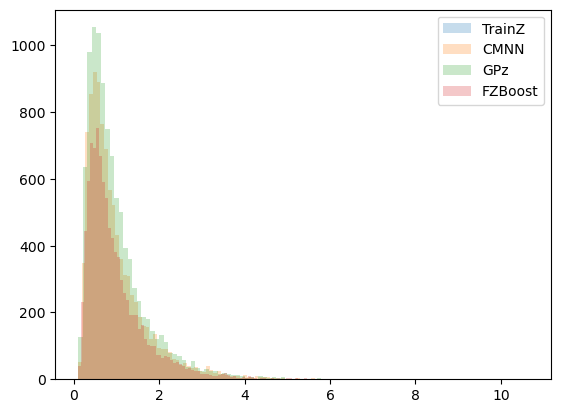

In [303]:
import matplotlib.pyplot as plt

plt.hist(TrainZ_tables[0]['ad'], bins = 100, alpha=0.25, label= "TrainZ", density=True)
plt.hist(CMNN_tables[0]['ad'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[0]['ad'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[0]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

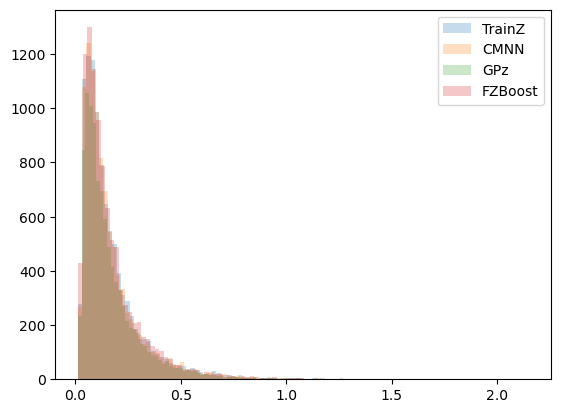

In [305]:
plt.hist(TrainZ_tables[0]['cvm'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[0]['cvm'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[0]['cvm'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[0]['cvm'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

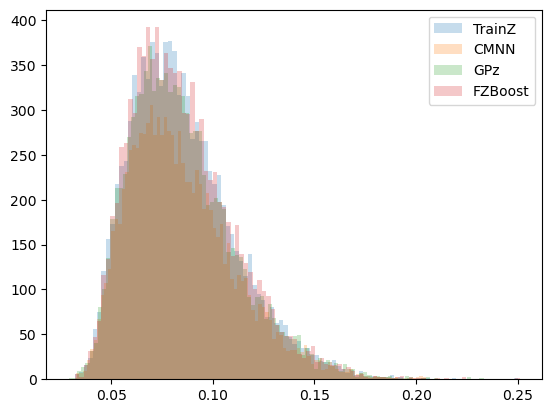

In [306]:
plt.hist(TrainZ_tables[0]['ks'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[0]['ks'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[0]['ks'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[0]['ks'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

## DEEP2

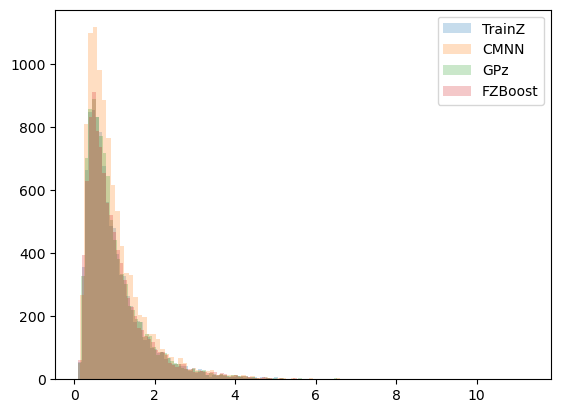

In [308]:
plt.hist(TrainZ_tables[1]['ad'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[1]['ad'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[1]['ad'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[1]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

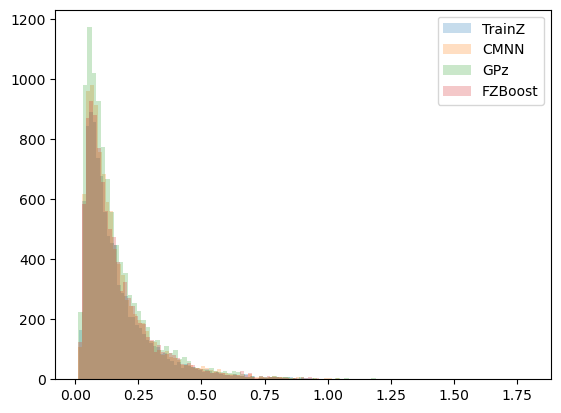

In [309]:
plt.hist(TrainZ_tables[1]['cvm'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[1]['cvm'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[1]['cvm'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[1]['cvm'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

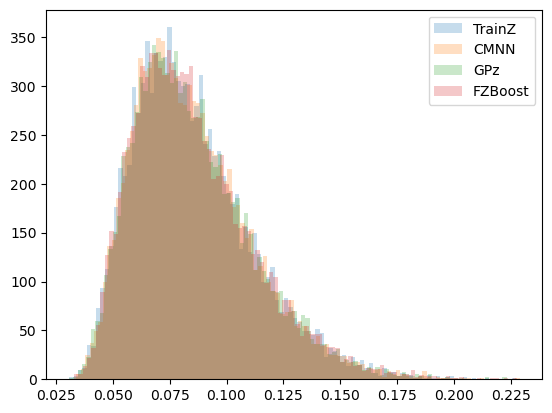

In [310]:
plt.hist(TrainZ_tables[1]['ks'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[1]['ks'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[1]['ks'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[1]['ks'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

## GAMA

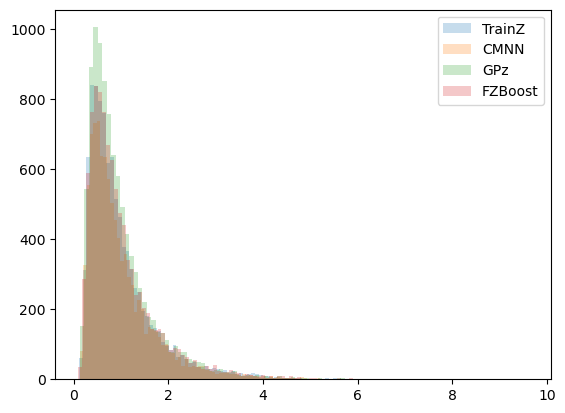

In [311]:
plt.hist(TrainZ_tables[2]['ad'], bins = 100, alpha=0.25, label= "TrainZ")
plt.hist(CMNN_tables[2]['ad'],  bins = 100, alpha=0.25, label = 'CMNN')
plt.hist(GPz_tables[2]['ad'],  bins = 100, alpha=0.25, label = "GPz")
plt.hist(FZBoost_tables[2]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

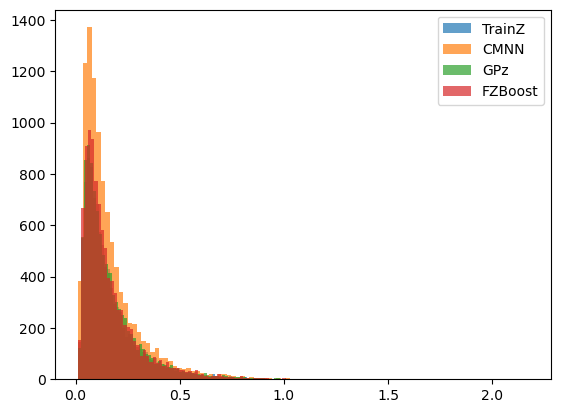

In [313]:
plt.hist(TrainZ_tables[2]['cvm'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[2]['cvm'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[2]['cvm'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[2]['cvm'],  bins = 100, alpha=0.7, label = "FZBoost")

plt.legend()

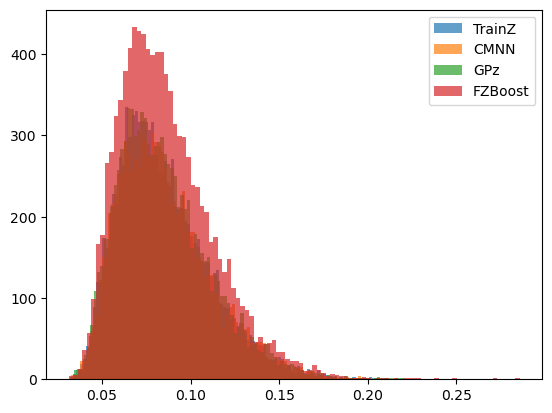

In [314]:
plt.hist(TrainZ_tables[2]['ks'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[2]['ks'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[2]['ks'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[2]['ks'],  bins = 100, alpha=0.7, label = "FZBoost")

plt.legend()

## HSC

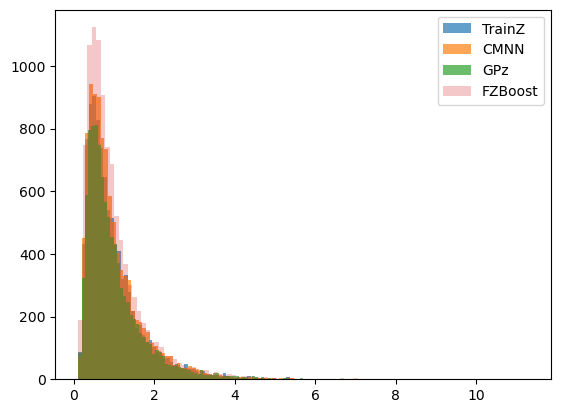

In [315]:
plt.hist(TrainZ_tables[3]['ad'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[3]['ad'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[3]['ad'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[3]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

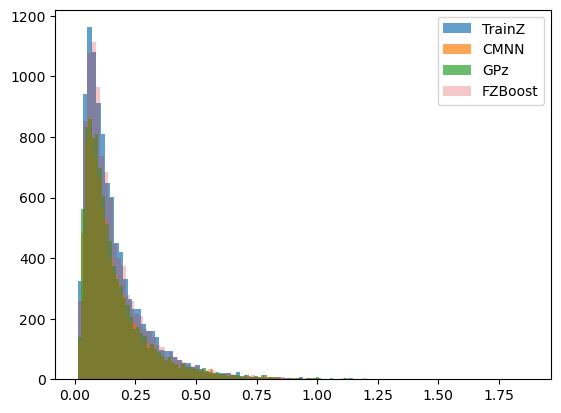

In [316]:
plt.hist(TrainZ_tables[3]['cvm'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[3]['cvm'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[3]['cvm'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[3]['cvm'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

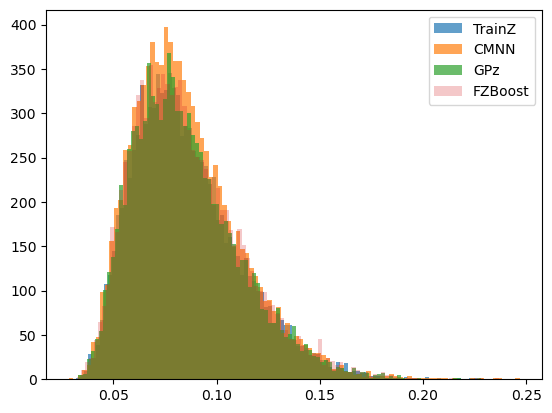

In [317]:
plt.hist(TrainZ_tables[3]['ks'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[3]['ks'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[3]['ks'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[3]['ks'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

## VVDSF02

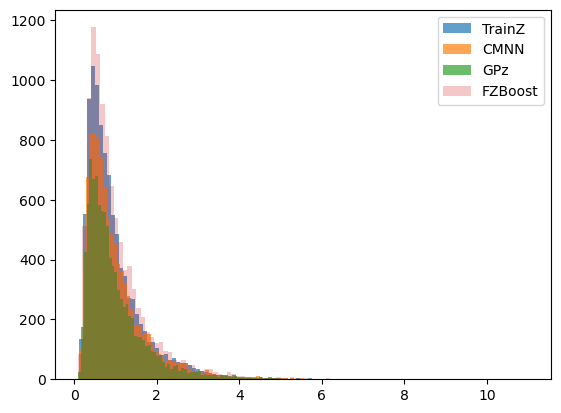

In [318]:
plt.hist(TrainZ_tables[4]['ad'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[4]['ad'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[4]['ad'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[4]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

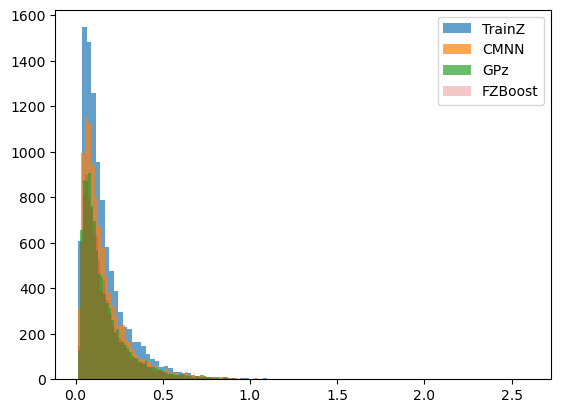

In [319]:
plt.hist(TrainZ_tables[4]['cvm'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[4]['cvm'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[4]['cvm'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[4]['cvm'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

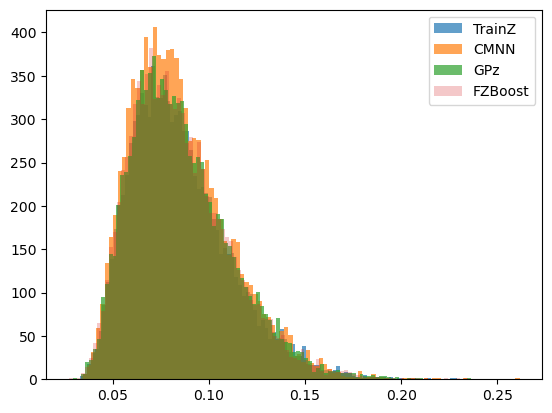

In [320]:
plt.hist(TrainZ_tables[4]['ks'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[4]['ks'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[4]['ks'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[4]['ks'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

## zCOSMOS

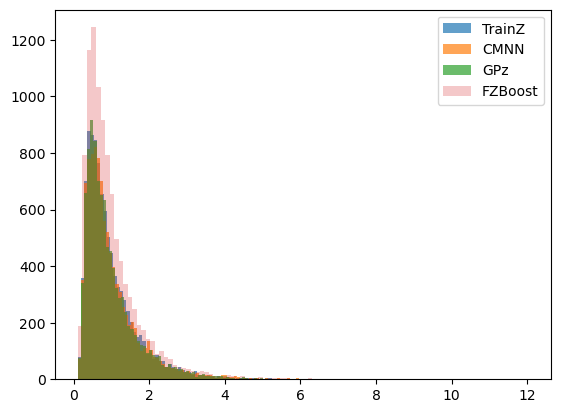

In [321]:
plt.hist(TrainZ_tables[5]['ad'], bins = 100, alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[5]['ad'],  bins = 100, alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[5]['ad'],  bins = 100, alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[5]['ad'],  bins = 100, alpha=0.25, label = "FZBoost")

plt.legend()

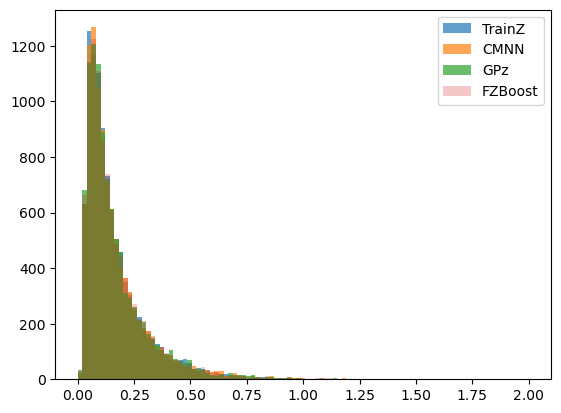

In [511]:
plt.hist(TrainZ_tables[5]['cvm'], bins = np.linspace(0, 2, 100), alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[5]['cvm'],  bins = np.linspace(0, 2, 100), alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[5]['cvm'],  bins = np.linspace(0, 2, 100), alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[5]['cvm'],  bins = np.linspace(0, 2, 100), alpha=0.25, label = "FZBoost")

plt.legend()

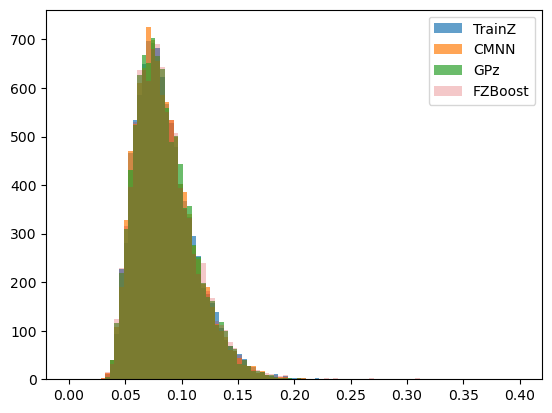

In [510]:
plt.hist(TrainZ_tables[5]['ks'], bins = np.linspace(0, 0.4, 100), alpha=0.7, label= "TrainZ")
plt.hist(CMNN_tables[5]['ks'],  bins = np.linspace(0, 0.4, 100), alpha=0.7, label = 'CMNN')
plt.hist(GPz_tables[5]['ks'],  bins = np.linspace(0, 0.4, 100), alpha=0.7, label = "GPz")
plt.hist(FZBoost_tables[5]['ks'],  bins = np.linspace(0, 0.4, 100), alpha=0.25, label = "FZBoost")

plt.legend()

# Point-to-dist

In [97]:
stage_dict = dict(
    metrics=['cdeloss', 'pit', 'brier'],
    _random_state=None,
    metric_config={
        'brier': {'limits':(0,3.1)},
        'pit':{'tdigest_compression': 1000},
    }
)
dtp_stage = DistToPointEvaluator.make_stage(name='dist_to_point', **stage_dict)

In [226]:
# ensemble = DS.read_file('ztrue_data', TableHandle, "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_GPz/outputs/1.0/output_estimate_GPz.hdf5")

# dtp_results = dtp_stage.evaluate(ztrue_data_2, ensemble)

# results_df = tables_io.convertObj(dtp_results['summary'](), tables_io.types.PD_DATAFRAME)
# results_df

# DS.read_file('ztrue_data', TableHandle, ztrue_file)

Requested metrics: ['cdeloss', 'pit', 'brier']
Processing 0 running evaluator on chunk 0 - 2.


KeyError: 'redshift'

In [110]:
file = h5py.File(ztrue_file, 'r')

<bound method MappingHDF5.keys of <HDF5 file "output_lsstErr_testSet_posts.hdf5" (mode r)>>


In [268]:
plt.plot(file['meta']['xvals'][0], file['data']['yvals'][8])
# plt.plot(file['meta']['xvals'][0], file.pdf(file['meta']['xvals'][0]))

z_ls = []
ind_ls = []
for i in np.asarray(file['data']['yvals']):
    max = np.max(i)
    ind = np.where(i == max)[0]
    ind_ls.append(ind)
    #z_ls.append(file['meta']['xvals'][0][ind[0]])

#len(file['data']['yvals'][0])


AttributeError: 'File' object has no attribute 'pdf'

In [325]:
file1 = h5py.File("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/BOSS/output_estimate_TrainZ.hdf5", 'r')
file2 = h5py.File("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_CMNN/outputs/1.4/output_estimate_CMNN.hdf5", 'r')
file3 = h5py.File("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_GPz/outputs/VVDSf02/output_estimate_GPz.hdf5", 'r')

file4 = h5py.File("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_FZBoost/outputs/zCOSMOS/output_estimate_FZBoost.hdf5", 'r')

In [326]:
print(file1.keys())
print(file2.keys())
print(file3.keys())
print(file4.keys())

<KeysViewHDF5 ['ancil', 'data', 'meta']>
<KeysViewHDF5 ['ancil', 'data', 'meta']>
<KeysViewHDF5 ['ancil', 'data', 'meta']>
<KeysViewHDF5 ['ancil', 'data', 'meta']>


In [331]:
print(file1['ancil']['zmode'])
print(file2['ancil']['zmode'])
print(file3['ancil']['zmode'])
print(file4['ancil']['zmode'])

<HDF5 dataset "zmode": shape (10000,), type "<f8">
<HDF5 dataset "zmode": shape (10000,), type "<f8">
<HDF5 dataset "zmode": shape (10000, 1), type "<f8">
<HDF5 dataset "zmode": shape (10000, 1), type "<f8">


In [262]:
print(file2['meta'].keys())
print(file2['meta']['pdf_name'][0])
print(file2['meta']['pdf_version'][0])


<KeysViewHDF5 ['pdf_name', 'pdf_version']>
b'norm'
0


10000

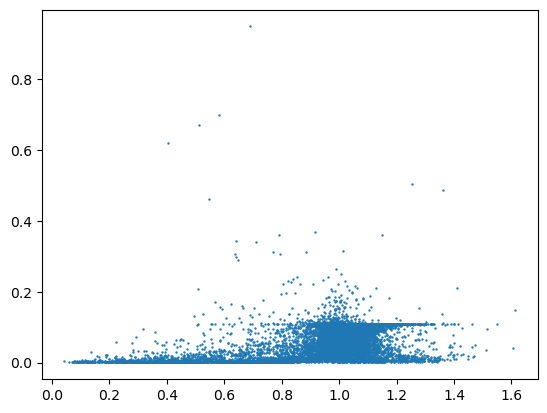

In [265]:
y = np.asarray(file3['data']['loc']) ## mean
x = np.asarray(file3['data']['scale']) ## stdev

plt.scatter(y, x, s=0.5)
# plt.xlim(0, 2)
# plt.ylim(0, 2)

len(x)

(0.0, 2.0)

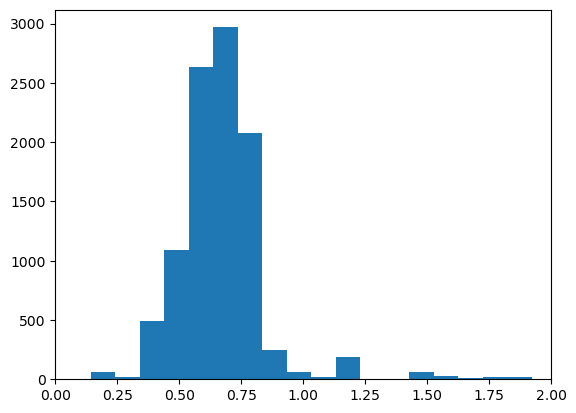

In [196]:
file2['ancil']['zmode']

plt.hist(file2['ancil']['zmode'], bins = 1000)
plt.xlim(0, 2)



In [275]:
ens = qp.read("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_PZFlow/outputs/VVDSf02/output_estimate_PZFlow.hdf5")

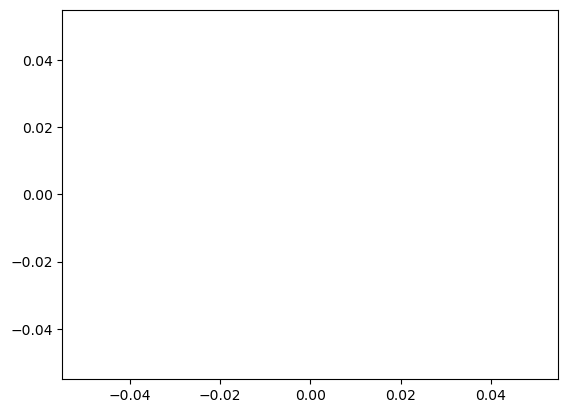

In [276]:
plt.plot(np.linspace(0, 1, 100), ens[3].pdf(np.linspace(0, 1, 100))[0])

# Failiure rates

In [332]:
est_ls = ['TrainZ', 'CMNN', 'GPz', 'FZBoost']
spec_ls = ['BOSS', 'DEEP2', 'GAMA', 'HSC', 'VVDSf02', 'zCOSMOS']
pivot_ls = ['1.0', '1.4']

In [405]:
ests_specs = []
for i in est_ls:
    specs = []
    for j in spec_ls:
        filepath = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_"+i+"/outputs/"+j+"/output_estimate_"+i+".hdf5"
        file = h5py.File(filepath, 'r')
        ct_0 = 0
        ct_nan = 0
        for k in file['ancil']['zmode']:
            #print(k)
            if k == 0.0 :#or 0.0 or 0.00:
                ct_0 += 1
            if k == 'NaN' or k=='nan' or k=='Nan':
                ct_nan += 1
                print('aaa!!!')
        if ct_0 != 0 and ct_nan == 0:
            specs.append(str(ct_0)+' zeros')
        if ct_nan != 0 and ct_0 == 0:
            specs.append(str(ct_nan)+' nans')
        if ct_0 != 0 and ct_nan != 0:
            tot_fails = ct_0 + ct_nan
            specs.append(str(ct_0)+' zeros and '+str(ct_nan)+' nans, '+str(tot_fails)+ ' total failiures')
        if ct_0 == 0 and ct_nan == 0:
            specs.append('esimated for everything')
    ests_specs.append(specs)

In [406]:
print(ests_specs)

[['esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything'], ['esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything', 'esimated for everything'], ['9857 zeros', '13 zeros', '9885 zeros', '18 zeros', 'esimated for everything', '3339 zeros'], ['8 zeros', '129 zeros', '201 zeros', '33 zeros', '24 zeros', '66 zeros']]


In [402]:
ests_pivots = []
for i in est_ls:
    pivots = []
    for j in pivot_ls:
        filepath = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/invz_lsstErr_"+i+"/outputs/"+j+"/output_estimate_"+i+".hdf5"
        file = h5py.File(filepath, 'r')
        ct_0 = 0
        ct_nan = 0
        for k in file['ancil']['zmode']:
            #print(k)
            if k == 0.0 :#or 0.0 or 0.00:
                ct_0 += 1
            if k == 'NaN' or k=='nan' or k=='Nan':
                ct_nan += 1
                print('aaaa!!!')
        if ct_0 != 0 and ct_nan == 0:
            pivots.append(str(ct_0)+' zeros')
        if ct_nan != 0 and ct_0 == 0:
            pivots.append(str(ct_nan)+' nans')
        if ct_0 != 0 and ct_nan != 0:
            tot_fails = ct_0 + ct_nan
            pivots.append(str(ct_0)+' zeros and '+str(ct_nan)+' nans, '+str(tot_fails)+ ' total failiures')
        if ct_0 == 0 and ct_nan == 0:
            pivots.append('esimated for everything')
    ests_pivots.append(pivots)

In [403]:
print(ests_pivots)

[['esimated for everything', 'esimated for everything'], ['esimated for everything', 'esimated for everything'], ['2 zeros', '4 zeros'], ['20 zeros', '20 zeros']]


In [496]:
i = 'GPz'
j = 'HSC'
pivots = []

filepath = "/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_"+i+"/outputs/"+j+"/output_estimate_"+i+".hdf5"
file = h5py.File(filepath, 'r')
ct_0 = 0
ct_nan = 0
print(len(file['ancil']['zmode']))
for k in file['ancil']['zmode']:
    #print(len(file['ancil']['zmode']))
    #print(k)
    if k == 0.0 or k == [0.0] or k == [0.]:# or k == []:#or 0.0 or 0.00:
        print(k)
        ct_0 += 1
    if k == 'NaN' or k=='nan' or k=='Nan':
        ct_nan += 1
        print('aaaa!!!')
if ct_0 != 0 and ct_nan == 0:
    pivots.append(str(ct_0)+' zeros')
if ct_nan != 0 and ct_0 == 0:
    pivots.append(str(ct_nan)+' nans')
if ct_0 != 0 and ct_nan != 0:
    tot_fails = ct_0 + ct_nan
    pivots.append(str(ct_0)+' zeros and '+str(ct_nan)+' nans, '+str(tot_fails)+ ' total failiures')

print(ct_0, ct_nan)


10000
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
18 0


In [495]:
import pandas as pd 

np.asarray(file['ancil']['zmode']).flatten()

orig = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/BOSS/output_train_set.pq")

np.asarray(orig['redshift']).flatten()

array([1.3684232, 1.5080856, 1.2070549, ..., 0.5338165, 1.4458658,
       1.1521654], dtype=float32)

(0.0, 20.0)

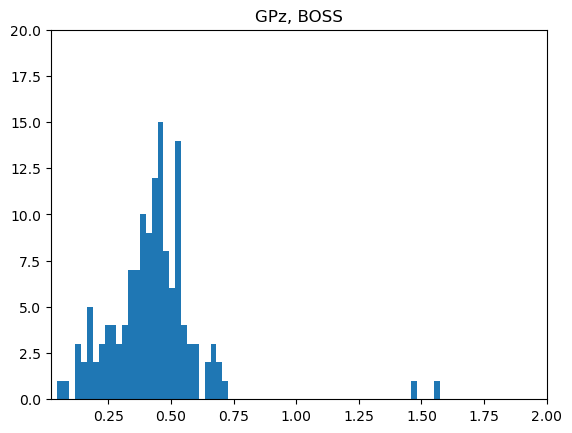

In [478]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100)
plt.title("GPz, BOSS")
plt.xlim(0.02, 2)
plt.ylim(0, 20)

Text(0.5, 1.0, 'GPz, DEEP2')

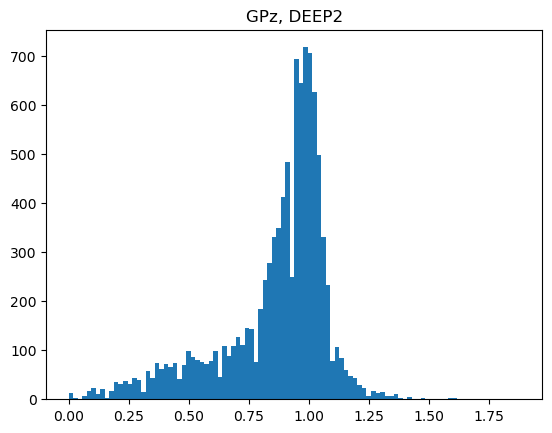

In [480]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100 )
plt.title("GPz, DEEP2")

(0.0, 10.0)

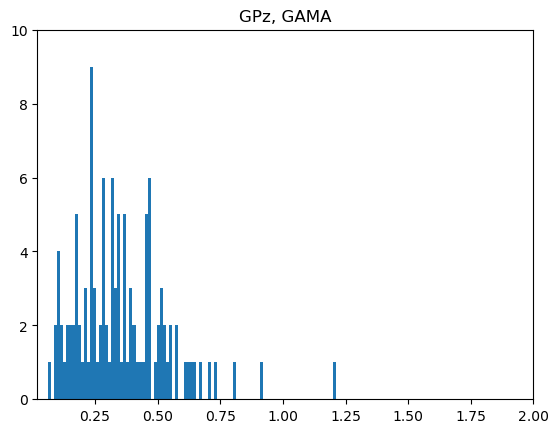

In [484]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100 )
plt.title("GPz, GAMA")
plt.xlim(0.02, 2)
plt.ylim(0, 10)

Text(0.5, 1.0, 'GPz, HSC')

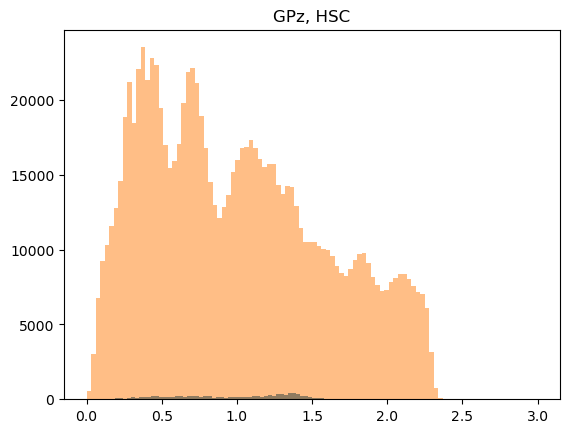

In [498]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100 )
plt.hist(np.asarray(orig['redshift']).flatten(), bins = 100, alpha = 0.5)
plt.title("GPz, HSC")

Text(0.5, 1.0, 'GPz, VVDSf02')

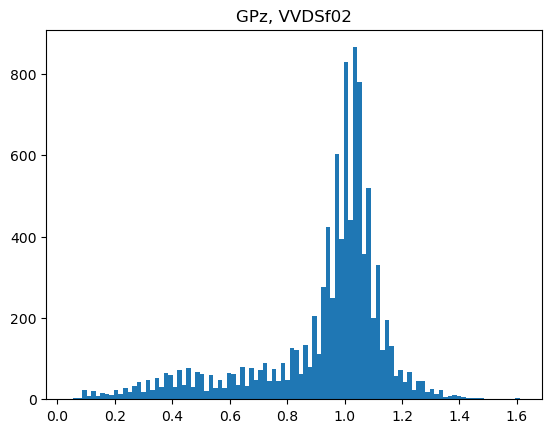

In [488]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100 )
plt.title("GPz, VVDSf02")

(0.0, 400.0)

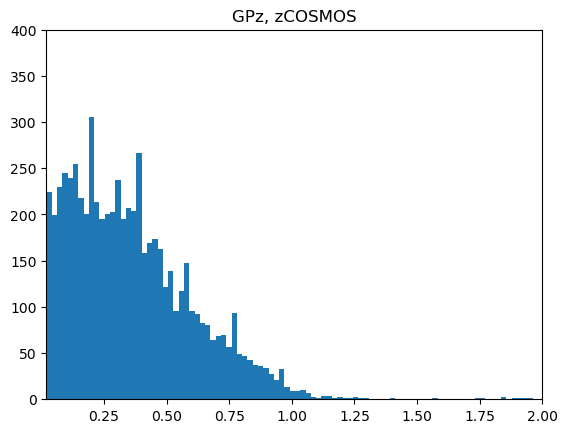

In [493]:
plt.hist(np.asarray(file['ancil']['zmode']).flatten(), bins = 100 )
plt.title("GPz, zCOSMOS")
plt.xlim(0.02, 2)
plt.ylim(0, 400)

In [407]:
# Import pandas library
import pandas as pd
 
# initialize list of lists
data = ests_specs
 
# Create the pandas DataFrame
df = pd.DataFrame(data, 
                  columns = ['BOSS, train set size = 1133', 'DEEP2, train set size = 52105', 'GAMA, train set size = 4567', 'HSC, train set size = 23902', 'VVDSf02, train set size = 137241', 'zCOSMOS, train set size = 57704'],
                  index = ['TrainZ', 'CMNN', 'GPz', 'FlexZBoost']
                  )
 
# print dataframe.
df

,"BOSS, train set size = 1133","DEEP2, train set size = 52105","GAMA, train set size = 4567","HSC, train set size = 23902","VVDSf02, train set size = 137241","zCOSMOS, train set size = 57704"
TrainZ,esimated for everything,esimated for everything,esimated for everything,esimated for everything,esimated for everything,esimated for everything
CMNN,esimated for everything,esimated for everything,esimated for everything,esimated for everything,esimated for everything,esimated for everything
GPz,9857 zeros,13 zeros,9885 zeros,18 zeros,esimated for everything,3339 zeros
FlexZBoost,8 zeros,129 zeros,201 zeros,33 zeros,24 zeros,66 zeros


In [409]:
# Import pandas library
import pandas as pd
 
# initialize list of lists
data = ests_pivots
 
# Create the pandas DataFrame
df = pd.DataFrame(data, 
                  columns = ['pivot z = 1.0, train set size = 85459', 'pivot z = 1.4, train set size = 94504'],
                  index = ['TrainZ', 'CMNN', 'GPz', 'FlexZBoost']
                  )
 
# print dataframe.
df

,"pivot z = 1.0, train set size = 85459","pivot z = 1.4, train set size = 94504"
TrainZ,esimated for everything,esimated for everything
CMNN,esimated for everything,esimated for everything
GPz,2 zeros,4 zeros
FlexZBoost,20 zeros,20 zeros


In [412]:
orig = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/BOSS/output_train_set.pq")
BOSS = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/BOSS/output_specselection_boss.pq")
DEEP2 = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/DEEP2/output_specselection_deep2.pq")
GAMA = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/GAMA/output_specselection_gama.pq")
HSC = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/HSC/output_specselection_HSC.pq")
VVDSf02 = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/VVDSf02/output_specselection_VVDSf02.pq")
zCOSMOS = pd.read_parquet("/Users/alicec03/Desktop/Summer_Research/Photo-z-Stress-Test/Photo-z-Stress-Test/specSelection_lsstErr_TrainZ/outputs/zCOSMOS/output_specselection_zCOSMOS.pq")

In [413]:
orig.keys()

Index(['redshift', 'mag_g_lsst', 'mag_i_lsst', 'mag_r_lsst', 'mag_u_lsst',
       'mag_y_lsst', 'mag_z_lsst'],
      dtype='object')

TypeError: Input z must be 2D, not 1D

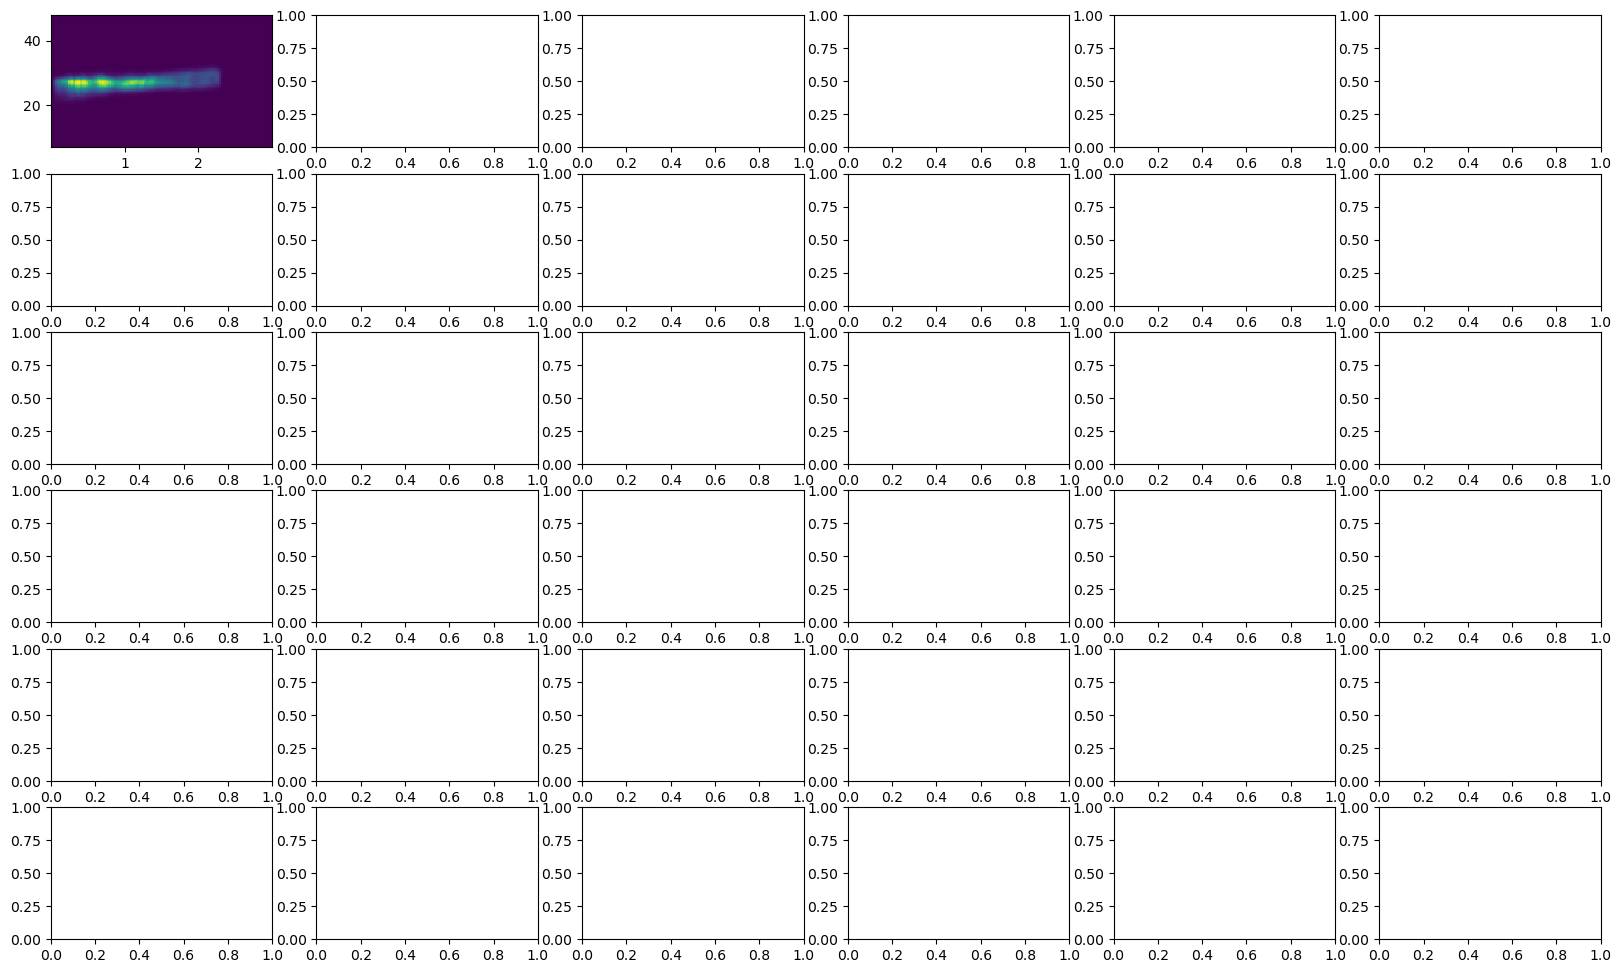

In [513]:
specs = [[BOSS, 0], [DEEP2,1], [GAMA,2], [HSC,3], [VVDSf02,4], [zCOSMOS,5]]
bands = [['mag_u_lsst',0], ['mag_g_lsst',1], ['mag_r_lsst',2], ['mag_i_lsst',3], ['mag_z_lsst',4], ['mag_y_lsst',5]]

fig, axes = plt.subplots(nrows = 6, ncols = 6, figsize = (20, 12)) 

for i in bands:
    for j in specs:
        axes[i[1]][j[1]].hist2d(orig['redshift'], orig[i[0]], bins = 100)
        axes[i[1]][j[1]].contour(j[0]['redshift'], j[0][i[0]], s=0.5, alpha=0.25, color = 'orange')
        
axes[0][0].set_ylabel("u band")
axes[1][0].set_ylabel("g band")
axes[2][0].set_ylabel("r band")
axes[3][0].set_ylabel("i band")
axes[4][0].set_ylabel("z band")
axes[5][0].set_ylabel("y band")

axes[0][0].set_title("BOSS")
axes[0][1].set_title("DEEP2")
axes[0][2].set_title("GAMA")
axes[0][3].set_title("HSC")
axes[0][4].set_title("VVDSf02")
axes[0][5].set_title("zCOSMOS")

fig.supxlabel("Redshift")
fig.supylabel("Magnitude")
fig.suptitle("Spectroscopic Survey Degradation")

print("Magnitude vs. redshift for spectroscopic survey degraders")

In [512]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, data=None, **kwargs) -> 'QuadContourSet'
    Plot contour lines.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    `.contour` and `.contourf` draw contour lines and filled contours,
    respectively.  Except as noted, function signatures and return values
    are the same for both versions.
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2D with the same shape as *Z* (e.g.
        created via `numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == N`` is the number of columns in *Z* and
        ``len(Y) == M`` is the number of rows in *Z*.
    
        *X* and *Y* must both be ordered monotonically.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(N)``, ``Y = range(M)``.
    
    Z : (M, N) array-like
        The height